In [2]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import geopandas as gpd
import seaborn as sns
import pymysql
import operator
from IPython.display import Image

ImportError: No module named 'geopandas'

In [3]:
!pip install geopandas

  Using cached geopandas-0.3.0-py2.py3-none-any.whl
    Complete output from command python setup.py egg_info:
    Traceback (most recent call last):
      File "<string>", line 1, in <module>
      File "C:\Users\CHENLI~1\AppData\Local\Temp\pip-build-gv6cvnhr\shapely\setup.py", line 80, in <module>
        from shapely._buildcfg import geos_version_string, geos_version, \
      File "C:\Users\CHENLI~1\AppData\Local\Temp\pip-build-gv6cvnhr\shapely\shapely\_buildcfg.py", line 200, in <module>
        lgeos = CDLL("geos_c.dll")
      File "c:\users\chen liu\anaconda3\lib\ctypes\__init__.py", line 347, in __init__
        self._handle = _dlopen(self._name, mode)
    OSError: [WinError 126] The specified module could not be found
    
    ----------------------------------------


Command "python setup.py egg_info" failed with error code 1 in C:\Users\CHENLI~1\AppData\Local\Temp\pip-build-gv6cvnhr\shapely\


## Part I H1B Overview and Analysis

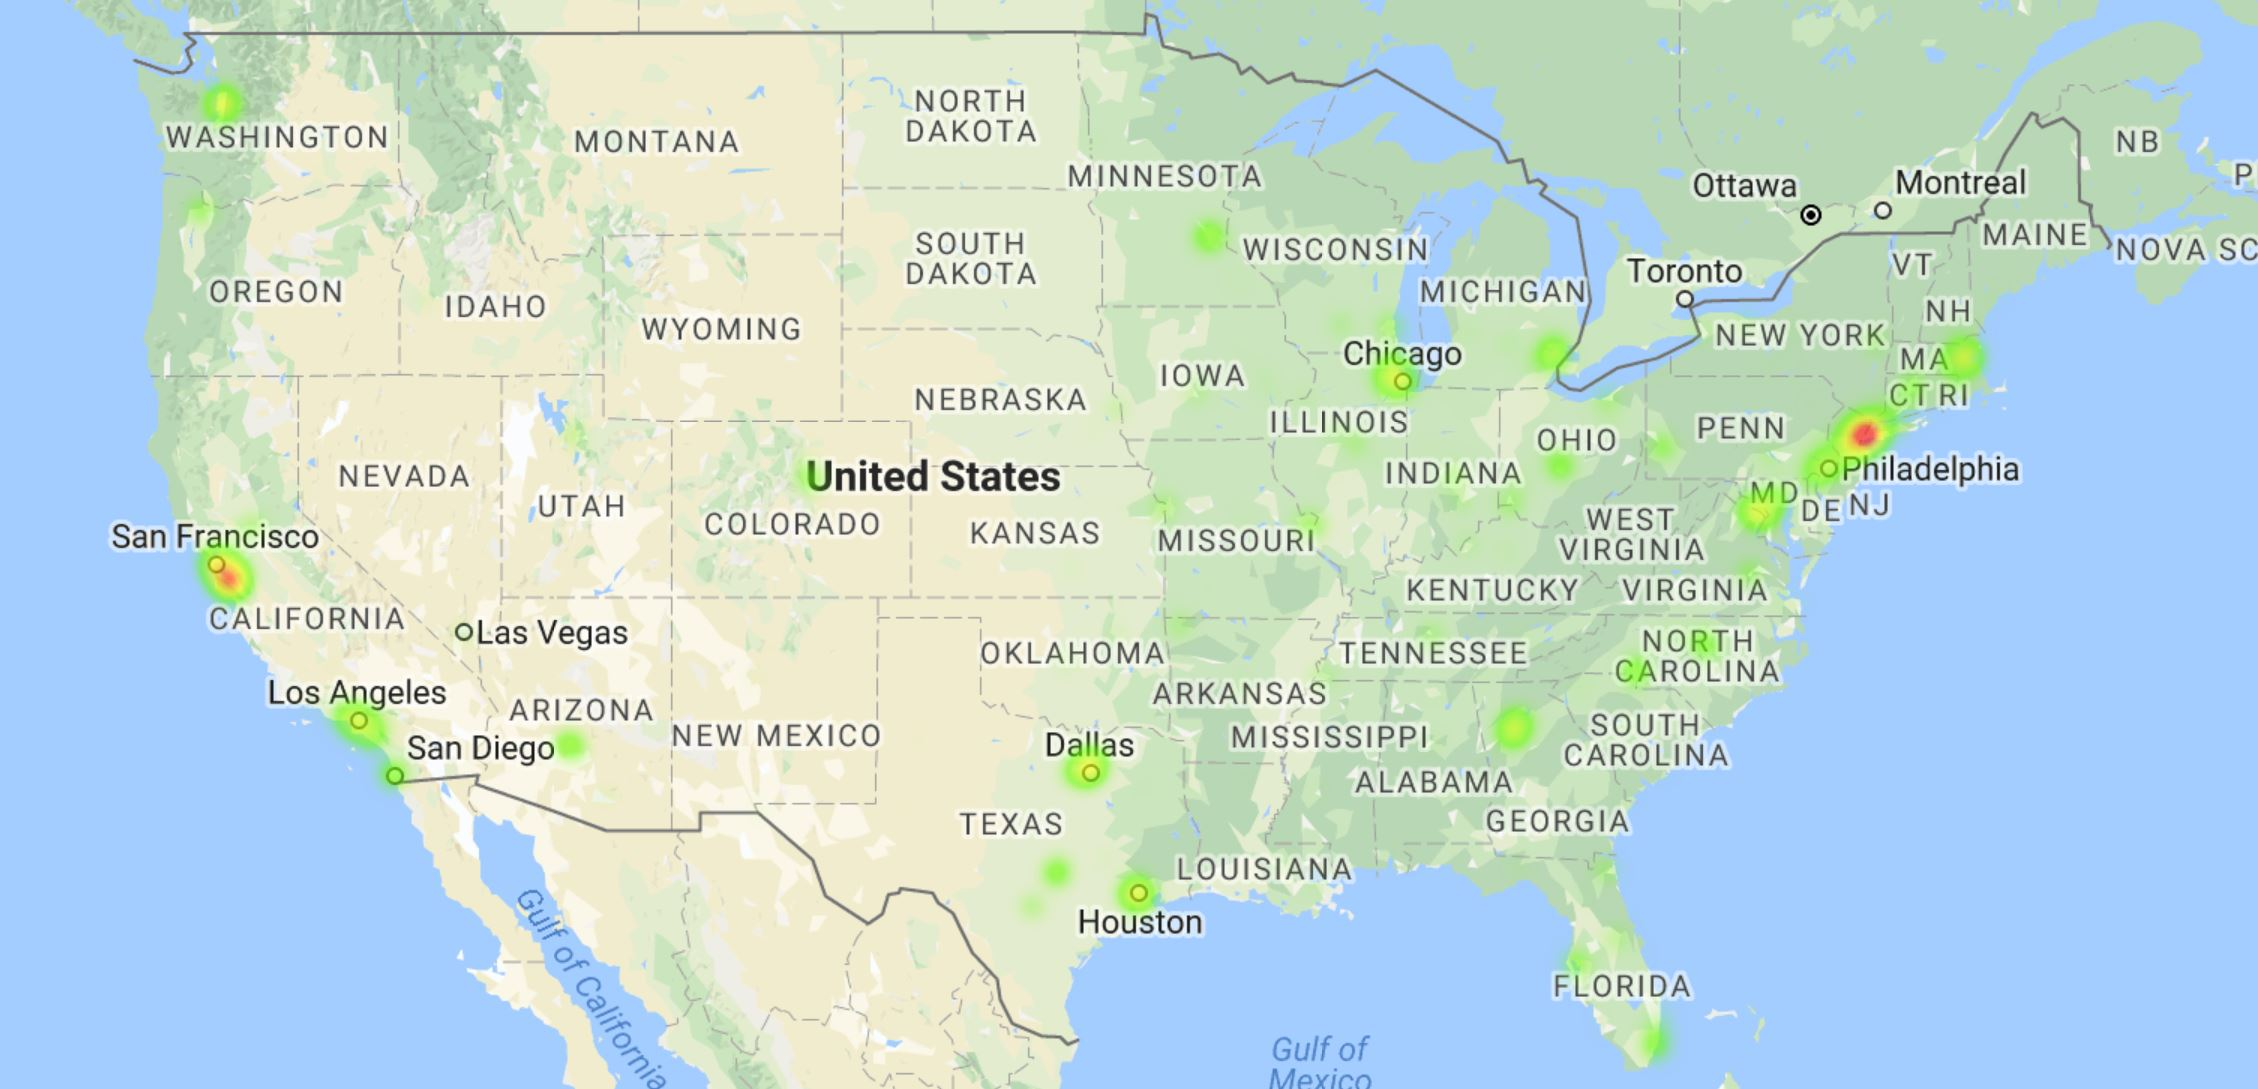

In [10]:

Image(filename = "7031512973689_.pic_hd.jpg", width=1000, height=1000)

In [12]:
mapping()

variables:STATE
datset column:
specific:


## Clean Data

In [3]:
def state(x):
    us_state_abbrev = {
    'Alabama': 'AL',
    'Alaska': 'AK',
    'Arizona': 'AZ',
    'Arkansas': 'AR',
    'California': 'CA',
    'Colorado': 'CO',
    'Connecticut': 'CT',
    'Delaware': 'DE',
    'Florida': 'FL',
    'Georgia': 'GA',
    'Hawaii': 'HI',
    'Idaho': 'ID',
    'Illinois': 'IL',
    'Indiana': 'IN',
    'Iowa': 'IA',
    'Kansas': 'KS',
    'Kentucky': 'KY',
    'Louisiana': 'LA',
    'Maine': 'ME',
    'Maryland': 'MD',
    'Massachusetts': 'MA',
    'Michigan': 'MI',
    'Minnesota': 'MN',
    'Mississippi': 'MS',
    'Missouri': 'MO',
    'Montana': 'MT',
    'Nebraska': 'NE',
    'Nevada': 'NV',
    'New Hampshire': 'NH',
    'New Jersey': 'NJ',
    'New Mexico': 'NM',
    'New York': 'NY',
    'North Carolina': 'NC',
    'North Dakota': 'ND',
    'Ohio': 'OH',
    'Oklahoma': 'OK',
    'Oregon': 'OR',
    'Pennsylvania': 'PA',
    'Rhode Island': 'RI',
    'South Carolina': 'SC',
    'South Dakota': 'SD',
    'Tennessee': 'TN',
    'Texas': 'TX',
    'Utah': 'UT',
    'Vermont': 'VT',
    'Virginia': 'VA',
    'Washington': 'WA',
    'West Virginia': 'WV',
    'Wisconsin': 'WI',
    'Wyoming': 'WY',
    'DISTRICT OF COLUMBIA':'DC',
    'PUERTO RICO':'PR'
    }
    
    for k, v in us_state_abbrev.items():
        if x ==k.upper():
            x=v
        else:
            x=x
    return x


In [4]:
def clean_total():
    data=pd.read_csv('h1b_kaggle.csv')
    del data["FULL_TIME_POSITION"]
    del data["Unnamed: 0"]
    df=data.dropna()
    df["YEAR"]=df["YEAR"].astype(int)
    df['STATE']=df['WORKSITE'].str.split(',', expand=True)[1]
    df['STATE']=df['STATE'].str.strip()
    df['STATE'] = df['STATE'].apply(state)
    data17 = pd.read_excel("2017_h1b_adjusted.xlsx", sheetname="2017_h1b")
    del data17["FULL_TIME_POSITION"]
    del data17["WORKSITE_CITY"]
    del data17["WORKSITE_COUNTY"]
    data17['YEAR'] = 2017
    data17=data17.rename(columns = {'WORKSITE_STATE':'STATE'})
    dat=pd.concat([df,data17])
    del dat["WORKSITE"]
    del dat['lat']
    del dat['lon']
    #dat=dat.dropna()
    dat=dat[~dat['STATE'].isin(['VI', 'PW', 'GU', 'FM', 'MP'])]
    return dat

In [5]:
dat=clean_total()

/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing

In [5]:
len(dat.index)#3501602

3501670

In [6]:
list(dat.columns.values)

['CASE_STATUS',
 'EMPLOYER_NAME',
 'JOB_TITLE',
 'PREVAILING_WAGE',
 'PW_UNIT_OF_PAY',
 'SOC_NAME',
 'STATE',
 'Unnamed: 7',
 'YEAR']

## H1B Visualization

In [6]:
class MyClass(object):
    def __init__(self,df):
       self.df = df
    
    def sort_img(self):
#         col="STATE"
        col=input("variables: ")
        img = self.df.groupby(col).size().nlargest(53).sort_values(ascending=False).plot(kind='bar',figsize=(20,10),color="orange",title="Applications per {}".format(col))
        img.set_xlabel(col)
        img.set_ylabel("Applications")
        return img.grid(True)
        
    def binary_img(self):
#         col1="STATE"
#         col2="YEAR"
        col1=input("variables1: ")
        col2=input("variables2: ")
        col = self.df.groupby([col1,col2])
        STATE_YEAR_plt=col.size().nlargest(371).unstack().plot(kind='bar',figsize=(12,12),title="Application each {} for {}".format(col1,col2))
        STATE_YEAR_plt.set_xlabel("Applications")
        STATE_YEAR_plt.set_ylabel(col)
        return STATE_YEAR_plt.grid(True)
    def pairplot(self):   
        return sns.pairplot(x_vars=["STATE"], y_vars=["PREVAILING_WAGE"], data=dat, hue="YEAR", size=12)
        
#     def dist_ply(self):
#         col="STATE"
# #         col=input("variables: ")
#         sns.distplot(self.df.groupby(col).size().nlargest(53).sort_values(ascending=False))
    
    def multiple_img(self):
#         col1="EMPLOYER_NAME"
#         col2="STATE"
        col1=input("variable1: ")
        col2=input("variable2: ")
        year_state = self.df.groupby([col1, col2]).size().unstack()
        COL_NUM = 3
        ROW_NUM = len(self.df[col2].unique())//3+1
        import matplotlib.pyplot as plt
        fig, axes = plt.subplots(ROW_NUM, COL_NUM, figsize=(30,40))

        for i, (col2,col1) in enumerate(year_state.items()): #i is used to position
            ax = axes[int(i/COL_NUM), i%COL_NUM]
            col1= col1.sort_values(ascending=False)[:6] 
            col1.plot(kind='barh', ax=ax)
            ax.set_title(col2)

        return plt.tight_layout()
    

In [7]:
a=MyClass(dat)

# Application Amount by State

variables: STATE


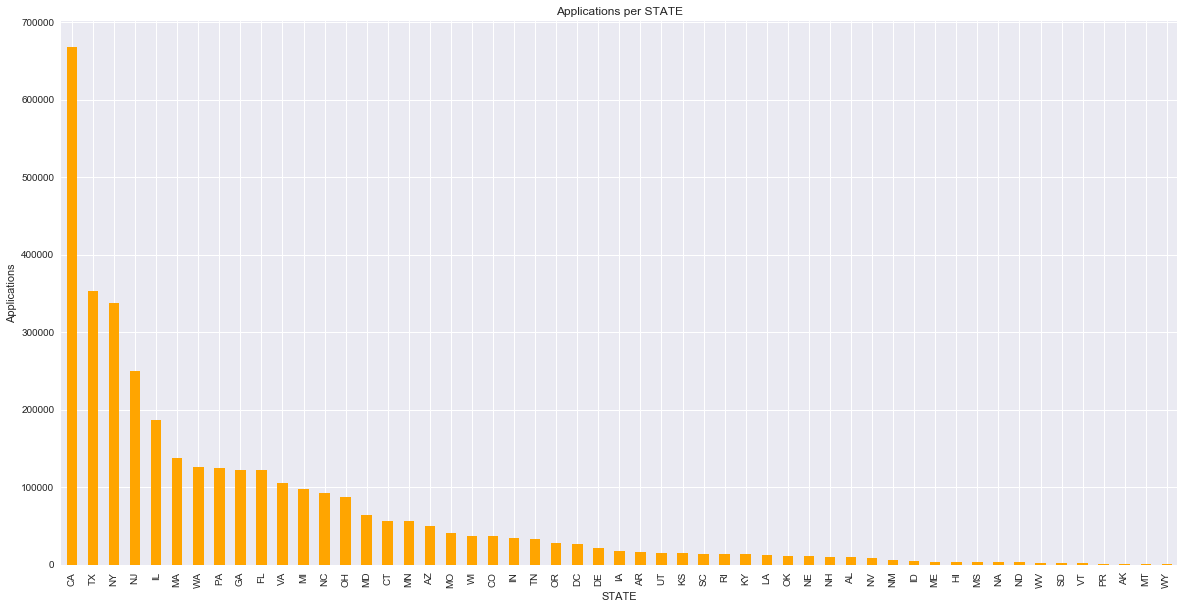

In [8]:
a.sort_img()

variables1: STATE
variables2: YEAR


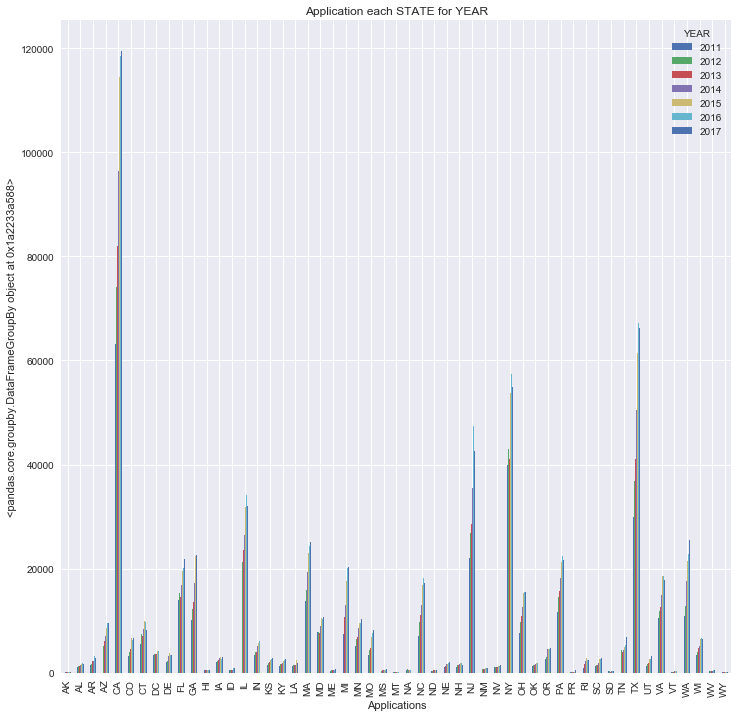

In [9]:
a.binary_img()

# Top Hired Companies in each State

variable1: EMPLOYER_NAME
variable2: STATE


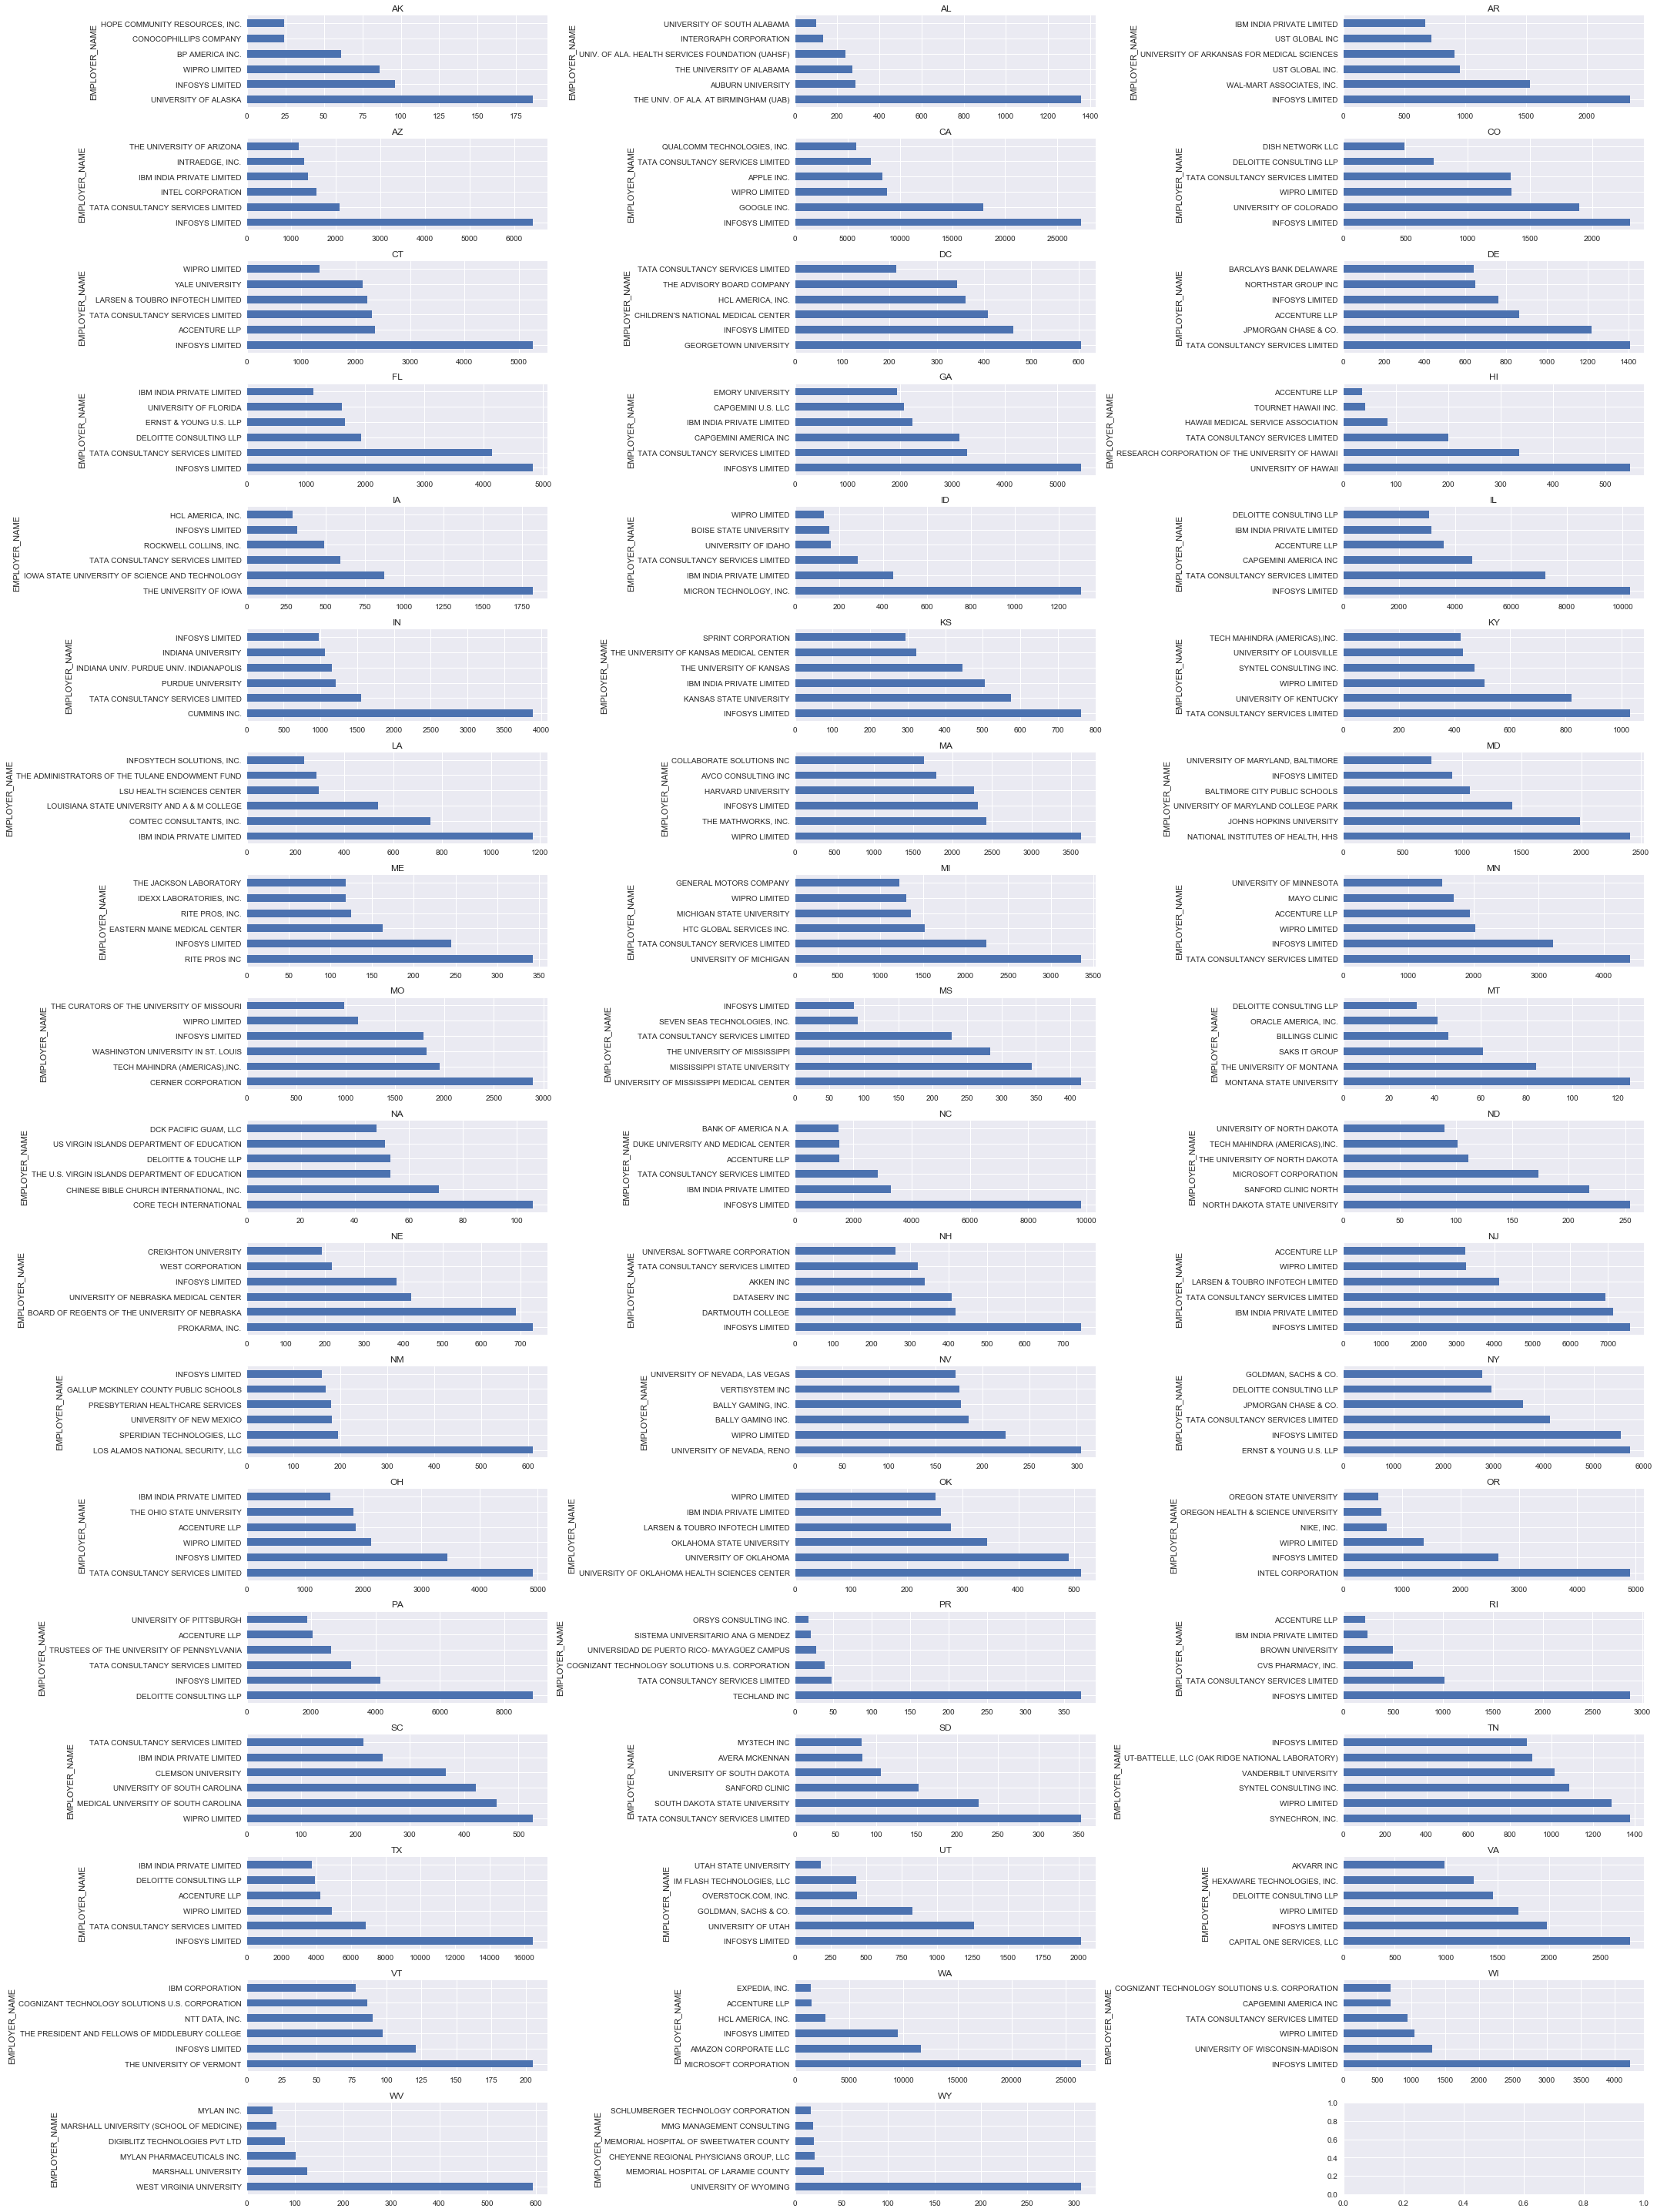

In [24]:
a.multiple_img()

In [10]:
def mapping():
    import plotly.plotly as py
    import pandas as pd
    import plotly 
    from IPython.display import Image


    col=input('variables:')
    col1=input('datset column:')
    col2=input('specific:')
    if col1 and col2:
        narrow_dat=dat[dat[col1]==col2]
    else:
        narrow_dat=dat
    mean_dat=pd.DataFrame(narrow_dat.groupby([col]).mean()['PREVAILING_WAGE'])
    count_dat=pd.DataFrame(narrow_dat.groupby([col]).count()['EMPLOYER_NAME'])
    img_dat=count_dat.join(mean_dat)
    img_pa=img_dat.rename(columns = {'EMPLOYER_NAME':'APPLICATIONS'})

    plotly.tools.set_credentials_file(username='sammixxx', api_key='uyr9wAP79XPoek8HoCtA')


    scl = [[0.0, 'rgb(242,240,247)'],[0.2, 'rgb(218,218,235)'],[0.4, 'rgb(188,189,220)'],\
                [0.6, 'rgb(158,154,200)'],[0.8, 'rgb(117,107,177)'],[1.0, 'rgb(84,39,143)']]


    img_pa['text'] = img_pa.index + '<br>' +\
        'Applications '+img_pa['APPLICATIONS'].astype(str)+' Avg Salary '+img_pa['PREVAILING_WAGE'].astype(str)


    data1 = [ dict(
            type='choropleth',
            colorscale = scl,
            autocolorscale = False,
            locations = img_pa.index,
            z = img_pa['APPLICATIONS'],
            locationmode = 'USA-states',
            text = img_pa['text'],
            marker = dict(
                line = dict (
                    color = 'rgb(255,255,255)',
                    width = 2
                ) ),
            colorbar = dict(
                title = "Applications")
            ) ]
    layout = dict(
            title = 'Applications per State',
            geo = dict(
                scope='usa',
                projection=dict( type='albers usa' ),
                showlakes = True,
                lakecolor = 'rgb(255, 255, 255)'),
                 )
    fig = dict( data=data1, layout=layout )
    return py.iplot(fig )

In [11]:
mapping()#PROGRAMMER ANALYST

variables:STATE
datset column:JOB_TITLE
specific:PROGRAMMER ANALYST


## Average Wage per Year

In [19]:
def average_data():
    col=input('variables:')
    col1=input('datset column:')
    col2=input('specific:')
    if col1 and col2:
        narrow_dat=dat[dat[col1]==col2]
    else:
        narrow_dat=dat
    mean_dat=pd.DataFrame(narrow_dat.groupby([col]).mean()['PREVAILING_WAGE'])
    count_dat=pd.DataFrame(narrow_dat.groupby([col]).count()['EMPLOYER_NAME'])
    img_dat=count_dat.join(mean_dat)
    img_dat=img_dat.rename(columns = {'EMPLOYER_NAME':'APPLICATIONS'})
    return img_dat

In [20]:
avg_dat=average_data()

variables:YEAR
datset column:
specific:


In [21]:
avg_dat

,APPLICATIONS,PREVAILING_WAGE
YEAR,,
2011,333625,194288.060074
2012,394267,176106.822690
2013,422427,194009.647824
2014,498027,181762.305063
2015,600120,91661.156577
2016,629299,89016.344110
2017,623849,99563.132647


# Top Hired Companies

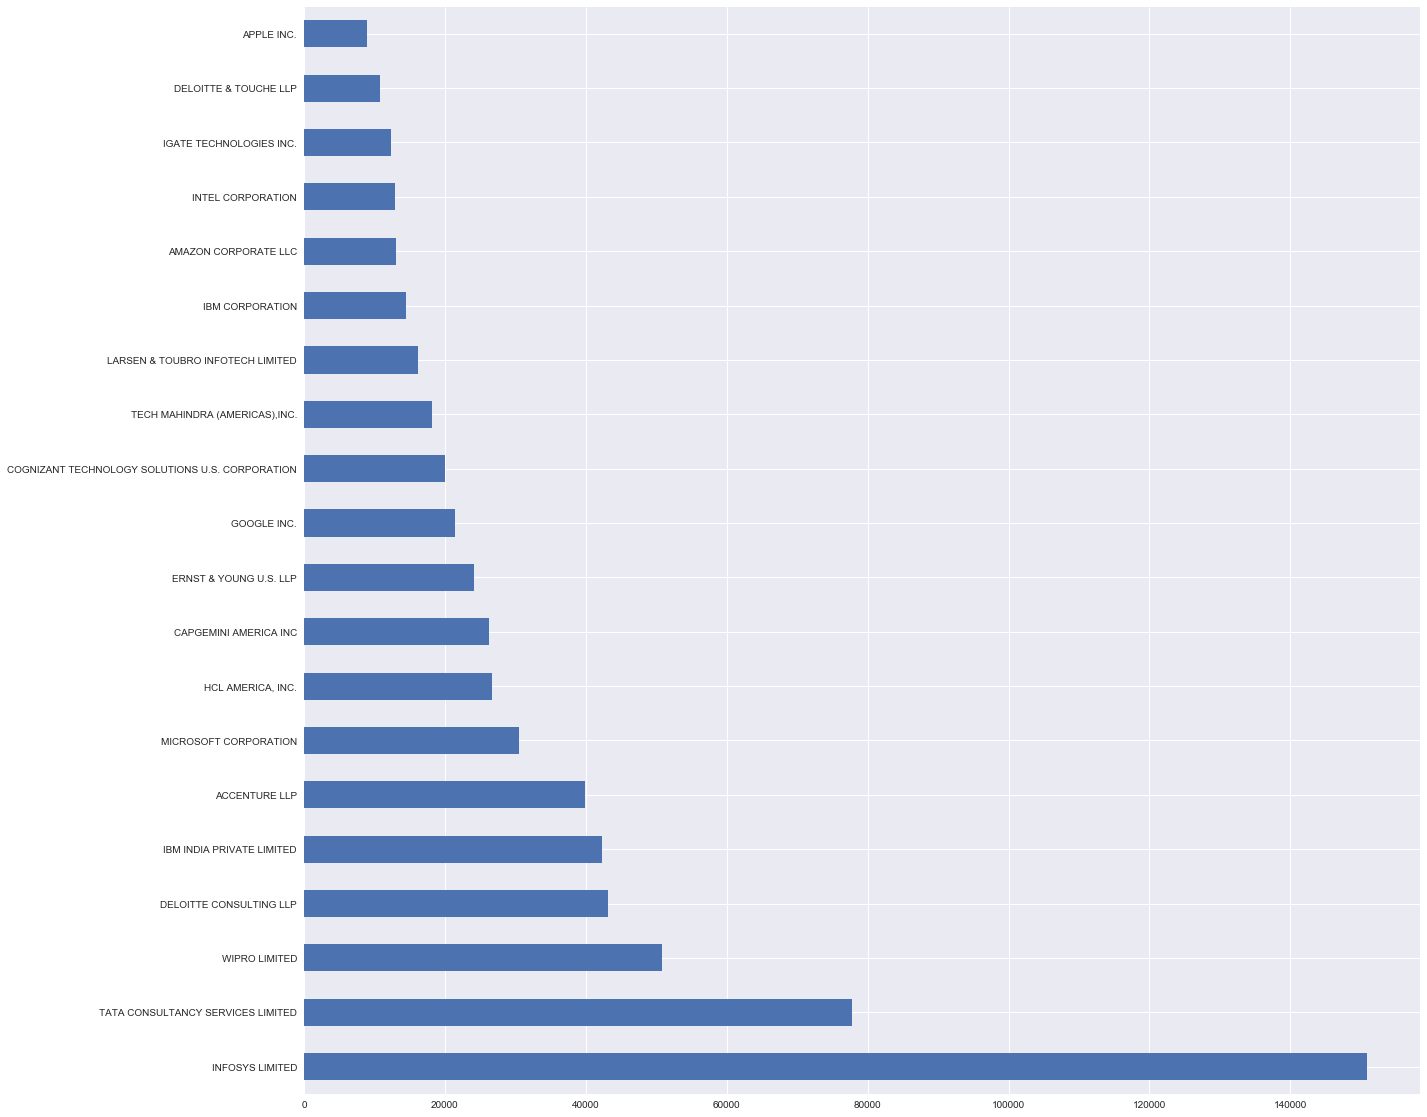

In [24]:
dat['EMPLOYER_NAME'].value_counts().nlargest(20).plot(kind="barh",figsize=(20, 20))

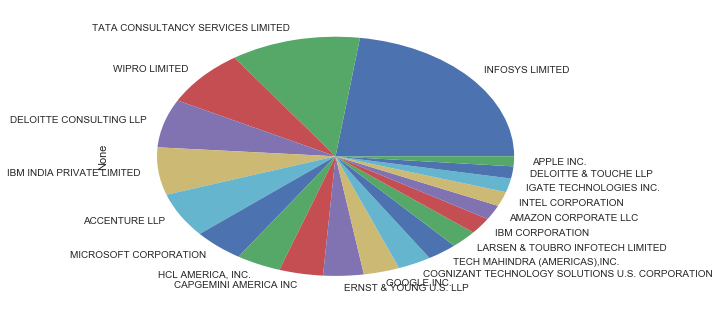

In [25]:
dat.groupby('EMPLOYER_NAME').size().nlargest(20).plot(kind='pie')

## TOP 100 Employers 2017 vs. 2016 Hiring # Change

In [26]:
dat2017 = dat[dat['YEAR'] == 2017]
data_top_2017_em = dat2017.groupby('EMPLOYER_NAME').size().nlargest(100).index.tolist()

In [27]:
dict_emp = dict()
for emp in data_top_2017_em:
    num2017 = int(dat[(dat['EMPLOYER_NAME'] == emp ) & (dat['YEAR'] == 2017)].count()[0])
    num2016 = int(dat[(dat['EMPLOYER_NAME'] == emp) & (dat['YEAR'] == 2016)].count()[0])
    dict_emp[emp] = num2017 - num2016

In [28]:
import operator
sorted_dict_emp = sorted(dict_emp.items(), key=operator.itemgetter(1),reverse=True)
sorted_dict_emp

[('SYNTEL CONSULTING INC.', 2347),
 ('ERNST & YOUNG U.S. LLP', 1627),
 ('AMAZON CORPORATE LLC', 1625),
 ('PEOPLE TECH GROUP INC.', 1397),
 ('MASTECH DIGITAL TECHNOLOGIES, INC., A MASTECH DIGITAL, INC. COMPANY', 1115),
 ('TECH MAHINDRA (AMERICAS),INC.', 892),
 ('TECHLAND INC', 846),
 ('TESLA, INC.', 816),
 ('ORACLE AMERICA, INC', 791),
 ('SYNTEL INC', 739),
 ('RANDSTAD TECHNOLOGIES, LLC', 735),
 ('WIPRO LLC', 635),
 ('FACEBOOK, INC.', 569),
 ('CAPGEMINI AMERICA, INC. (LEGACY CAPGEMINI FINANCIAL SERVICES, INC.)', 540),
 ('TATA CONSULTANCY SERVICES LIMITED', 496),
 ('PRICEWATERHOUSECOOPERS ADVISORY SERVICES LLC', 476),
 ('JPMORGAN CHASE &AMP; CO.', 470),
 ('NTT DATA SERVICES, LLC', 460),
 ('VMWARE, INC.', 431),
 ('KFORCE INC.', 424),
 ('CAPITAL ONE SERVICES, LLC', 377),
 ('GOOGLE INC.', 293),
 ('SALESFORCE.COM INC.', 264),
 ('MPHASIS CORPORATION', 254),
 ('MAKEURCAREER LLC', 252),
 ('FUJITSU AMERICA, INC.', 241),
 ('SYNECHRON, INC.', 240),
 ('JPMORGAN CHASE & CO.', 228),
 ('COMPUNNEL SOFT

## Denied

In [22]:
dat['status'] = np.where(dat['CASE_STATUS']=='DENIED', 'DENIED', 'Other')

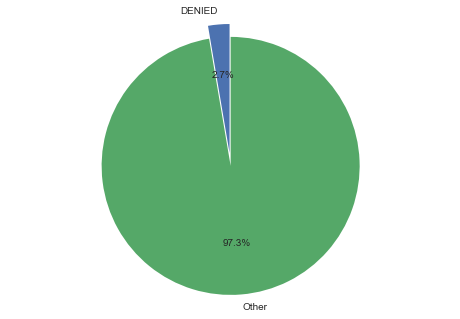

In [23]:
import matplotlib.pyplot as plt

# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = 'DENIED', 'Other'
sizes = dat.groupby('status').size()
explode = (0, 0.1)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=False, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

## Top job title in top campanies

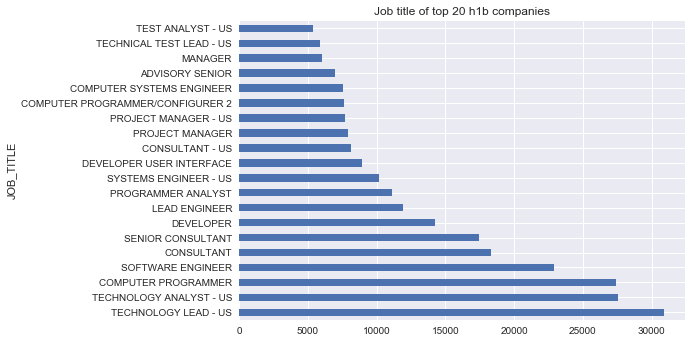

In [29]:
top_20=dat.groupby('EMPLOYER_NAME').CASE_STATUS.count().nlargest(20).index.tolist()
top_20_df=dat.loc[dat.EMPLOYER_NAME.isin(top_20)]
top_20_df.groupby('JOB_TITLE').EMPLOYER_NAME.count().nlargest(20).plot(kind='barh',title='Job title of top 20 h1b companies')

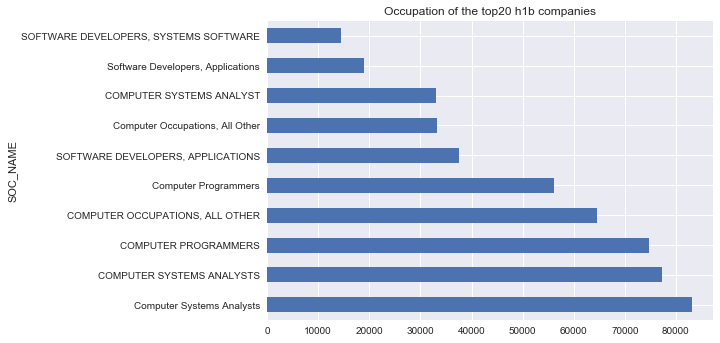

In [35]:
top_20_df.groupby('SOC_NAME').EMPLOYER_NAME.count().nlargest(10).plot(kind='barh',title='Occupation of the top20 h1b companies')

# Box Plot for top 20 jobs' wage

/anaconda/lib/python3.6/site-packages/numpy/core/fromnumeric.py:57: FutureWarning:

reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead



([], <a list of 0 Text yticklabel objects>)

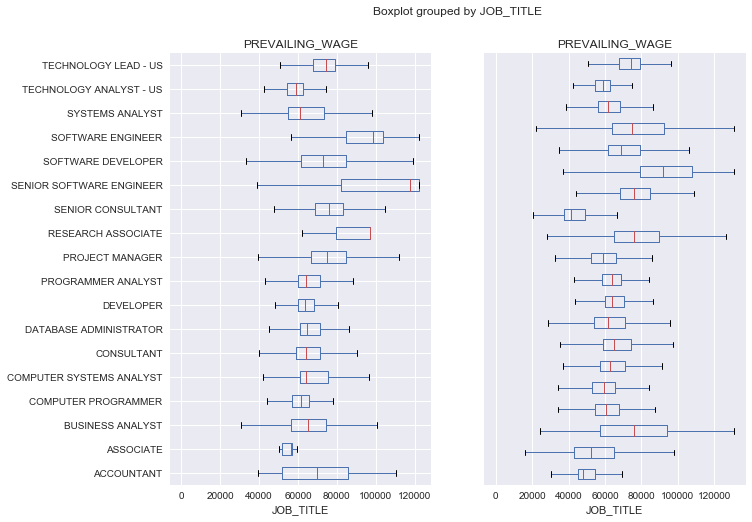

In [36]:
common_jobs=dat.groupby('JOB_TITLE').EMPLOYER_NAME.count().sort_values(ascending=False).index[0:20]
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 8))


top_20_df_common_jobs=top_20_df[top_20_df.JOB_TITLE.isin(common_jobs)]
top_20_df_common_jobs=top_20_df_common_jobs[top_20_df_common_jobs.PREVAILING_WAGE<=top_20_df_common_jobs.PREVAILING_WAGE.quantile(0.99)]
top_20_df_common_jobs.boxplot(column='PREVAILING_WAGE',by='JOB_TITLE',vert=False,ax=axes[0])

h1b_common_jobs=dat[dat.JOB_TITLE.isin(common_jobs)]
h1b_common_jobs=h1b_common_jobs[h1b_common_jobs.PREVAILING_WAGE<=h1b_common_jobs.PREVAILING_WAGE.quantile(0.99)]
h1b_common_jobs.boxplot(column='PREVAILING_WAGE',by='JOB_TITLE',vert=False,ax=axes[1])
plt.yticks([])

/anaconda/lib/python3.6/site-packages/numpy/core/fromnumeric.py:57: FutureWarning:

reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead



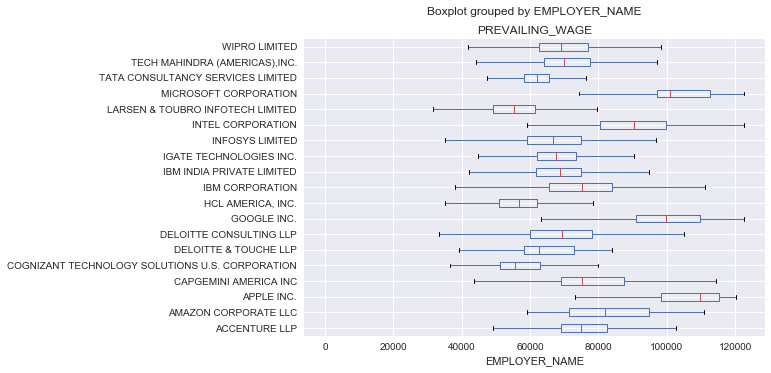

In [37]:
top_20_df_common_jobs.boxplot(column='PREVAILING_WAGE',by='EMPLOYER_NAME',vert=False)

## 

Text(0,0.5,'JOB_TITLE')

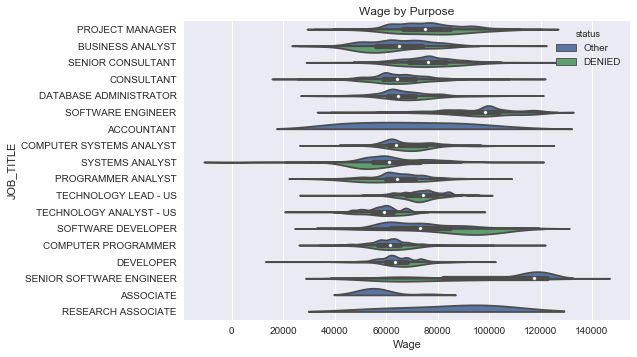

In [43]:
sns.violinplot(y="JOB_TITLE", x="PREVAILING_WAGE", hue="status", data=top_20_df_common_jobs, split=True,size =15,verse=True)
plt.title("Wage by Purpose")
plt.xlabel("Wage")
plt.ylabel("JOB_TITLE")

In [276]:
mean_dat=pd.DataFrame(dat.groupby(['YEAR']).mean()['PREVAILING_WAGE'])

In [281]:
wage = dat.groupby(['YEAR'])['PREVAILING_WAGE'].mean().round(2)
wage

YEAR
2011    194288.06
2012    176106.82
2013    194009.65
2014    181762.31
2015     91661.16
2016     89016.34
2017     99565.65
Name: PREVAILING_WAGE, dtype: float64

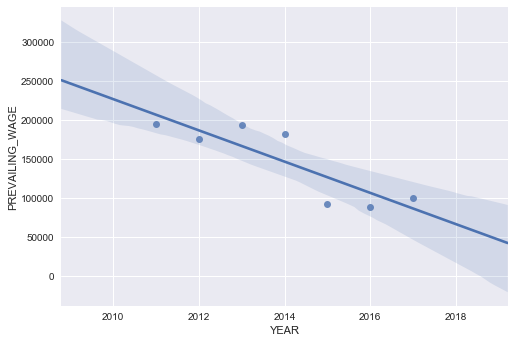

In [67]:
sns.regplot(x="YEAR", y="PREVAILING_WAGE", data=avg_dat);

In [30]:
dat_den=dat[dat.CASE_STATUS !='DENIED' ]
mean_dat=pd.DataFrame(dat_den.groupby(['YEAR']).mean()['PREVAILING_WAGE'])
count_dat=pd.DataFrame(dat_den.groupby(['YEAR']).count()['EMPLOYER_NAME'])
img_dat=count_dat.join(mean_dat)
img_dat=img_dat.rename(columns = {'EMPLOYER_NAME':'APPLICATIONS'})
img_dat

,APPLICATIONS,PREVAILING_WAGE
YEAR,,
2011,307639,87771.447751
2012,375401,74650.090975
2013,411451,79922.599252
2014,487211,84703.806112
2015,590083,75595.952017
2016,620819,75762.384888
2017,615439,83194.642901


In [50]:
mean_dat=pd.DataFrame(top_20_df_common_jobs.groupby(['YEAR']).mean()['PREVAILING_WAGE'])
count_dat=pd.DataFrame(top_20_df_common_jobs.groupby(['YEAR']).count()['EMPLOYER_NAME'])
img_dat=count_dat.join(mean_dat)
img_dat=img_dat.rename(columns = {'EMPLOYER_NAME':'APPLICATIONS'})
img_dat

,APPLICATIONS,PREVAILING_WAGE
YEAR,,
2011,10743,64875.217034
2012,17709,65825.131865
2013,31140,66589.340231
2014,30652,68692.446073
2015,42252,71074.222489
2016,38391,74612.201886
2017,23486,75076.122396


In [62]:
img_dat=img_dat.reset_index()

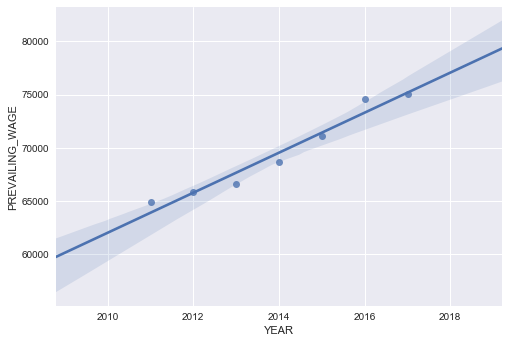

In [63]:
sns.regplot(x='YEAR', y="PREVAILING_WAGE", data=img_dat);

## Top 19 popular jobs in IEOR

In [31]:
list_19=['BUSINESS ANALYST','BUSINESS INTELLIGENCE ENGINEER','CONSULTANT','DATA ANALYST','DATA ENGINEER','DATA SCIENTIST','MARKETS ANALYST','INVESTMENT BANKING ANALYST','JAVA DEVELOPER','MEDIA ANALYST','OPERATIONS ANALYST',"PORTFOLIO ANALYST","PRICING ANALYST","PROGRAMMING MANAGER","PROJECT MANAGER","QUANTITATIVE ANALYST","QUANTITATIVE TRADER","RISK MANAGEMENT","STRATEGIC SOURCING MANAGER"]

In [32]:
len(dat)

3501670

In [119]:
def refine_dat():
    d = pd.DataFrame()
    for i in list_19:
        some_list=dat['JOB_TITLE']
        matching=[s for s in some_list if i in s]
        b=dat[dat['JOB_TITLE'].isin(matching)]
        b['title']=i
        d = pd.concat([d,b])
    return d
df2=refine_dat()

/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [355]:
dict_orjb_13 = dict()
dict_orjb_14 = dict()
dict_orjb_15 = dict()
dict_orjb_16 = dict()
dict_orjb_17 = dict()
dict_orjb_12 = dict()
for jb in list_19:
    numorj2017 = int(df2[(df2['title'] == jb ) & (df2['YEAR'] == 2017)].count()[0])
    numorj2016 = int(df2[(df2['title'] == jb ) & (df2['YEAR'] == 2016)].count()[0])
    numorj2015 = int(df2[(df2['title'] == jb ) & (df2['YEAR'] == 2015)].count()[0])
    numorj2014 = int(df2[(df2['title'] == jb ) & (df2['YEAR'] == 2014)].count()[0])
    numorj2013 = int(df2[(df2['title'] == jb ) & (df2['YEAR'] == 2013)].count()[0])
    numorj2012 = int(df2[(df2['title'] == jb) & (df2['YEAR'] == 2012)].count()[0])
    dict_orjb_17[jb] = numorj2017
    dict_orjb_16[jb] = numorj2016
    dict_orjb_15[jb] = numorj2015
    dict_orjb_14[jb] = numorj2014
    dict_orjb_13[jb] = numorj2013
    dict_orjb_12[jb] = numorj2012
sorted_dict_orjb_17 = list((dict_orjb_17.items()))
sorted_dict_orjb_13 = list((dict_orjb_13.items()))
sorted_dict_orjb_14 = list((dict_orjb_14.items()))
sorted_dict_orjb_15 = list((dict_orjb_15.items()))
sorted_dict_orjb_16 = list((dict_orjb_16.items()))
sorted_dict_orjb_12 = list((dict_orjb_12.items()))

dat17=pd.DataFrame(sorted_dict_orjb_17)
dat13=pd.DataFrame(sorted_dict_orjb_13)
dat14=pd.DataFrame(sorted_dict_orjb_14)
dat15=pd.DataFrame(sorted_dict_orjb_15)
dat16=pd.DataFrame(sorted_dict_orjb_16)
dat12=pd.DataFrame(sorted_dict_orjb_12)
dat17.columns = ['Job_Title','2017']
dat13.columns = ['Job_Title','2013']
dat14.columns = ['Job_Title','2014']
dat15.columns = ['Job_Title','2015']
dat16.columns = ['Job_Title','2016']
dat12.columns = ['Job_Title','2012']
dat17=dat17.merge(dat16, left_on='Job_Title', right_on='Job_Title', how='outer')
dat17=dat17.merge(dat15, left_on='Job_Title', right_on='Job_Title', how='outer')
dat17=dat17.merge(dat14, left_on='Job_Title', right_on='Job_Title', how='outer')
dat17=dat17.merge(dat13, left_on='Job_Title', right_on='Job_Title', how='outer')
dat17=dat17.merge(dat12, left_on='Job_Title', right_on='Job_Title', how='outer')
#dat17.set_index('Job_Title',inplace=True)

In [357]:
dat17['Job_Title'] = dat17['Job_Title'].apply(lambda x: x.replace(' ','_'))
dat17['Job_Title']

0                   BUSINESS_ANALYST
1     BUSINESS_INTELLIGENCE_ENGINEER
2                         CONSULTANT
3                       DATA_ANALYST
4                      DATA_ENGINEER
5                     DATA_SCIENTIST
6                    MARKETS_ANALYST
7         INVESTMENT_BANKING_ANALYST
8                     JAVA_DEVELOPER
9                      MEDIA_ANALYST
10                OPERATIONS_ANALYST
11                 PORTFOLIO_ANALYST
12                   PRICING_ANALYST
13               PROGRAMMING_MANAGER
14                   PROJECT_MANAGER
15              QUANTITATIVE_ANALYST
16               QUANTITATIVE_TRADER
17                   RISK_MANAGEMENT
18        STRATEGIC_SOURCING_MANAGER
Name: Job_Title, dtype: object

In [410]:
dat17['rank'] = dat17['2017'].rank(ascending=False)
dat17_1=dat17[dat17['rank'] <=5]
dat17_2=dat17[(dat17['rank'] >5)&(dat17['rank']<=9)]
dat17_3=dat17[dat17['rank'] >10]

In [411]:
dat_17_1=dat17_1.transpose()
dat_17_2=dat17_2.transpose()
dat_17_3=dat17_3.transpose()
dat_17_1.columns = dat_17_1.iloc[0]
dat_17_2.columns = dat_17_2.iloc[0]
dat_17_3.columns = dat_17_3.iloc[0]
dat_17_1=dat_17_1.iloc[1:]
dat_17_2=dat_17_2.iloc[1:]
dat_17_3=dat_17_3.iloc[1:]

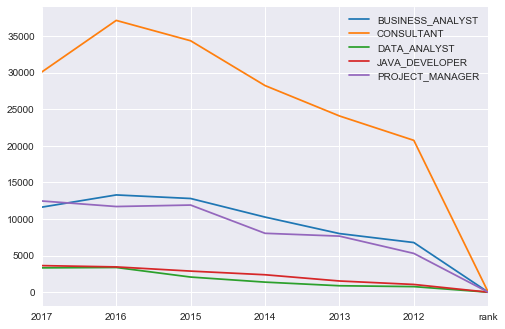

In [412]:

ax=dat_17_1.plot(color=["#1f77b4", "#ff7f0e", "#2ca02c", "#d62728", "#9467bd", "#8c564b", "#e377c2", "#7f7f7f", "#bcbd22", "#17becf"])
ax.legend(bbox_to_anchor=(1,1))

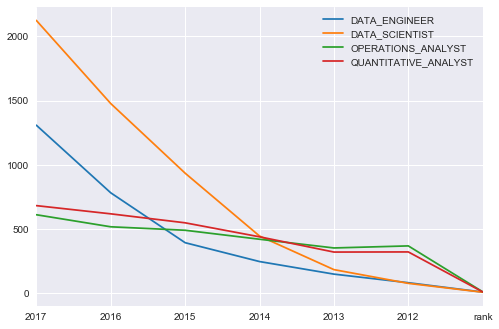

In [413]:

ax2=dat_17_2.plot(color=["#1f77b4", "#ff7f0e", "#2ca02c", "#d62728", "#9467bd", "#8c564b", "#e377c2", "#7f7f7f", "#bcbd22", "#17becf"])
ax2.legend(bbox_to_anchor=(1,1))

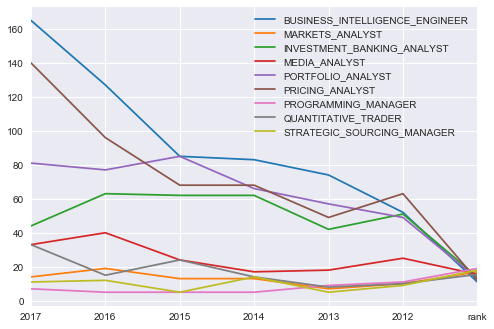

In [414]:

ax2=dat_17_3.plot(color=["#1f77b4", "#ff7f0e", "#2ca02c", "#d62728", "#9467bd", "#8c564b", "#e377c2", "#7f7f7f", "#bcbd22", "#17becf"])
ax2.legend(bbox_to_anchor=(1,1))

In [415]:
dat17

,Job_Title,2017,2016,2015,2014,2013,2012,rank
0,BUSINESS_ANALYST,11620,13288,12801,10263,8011,6784,3.0
1,BUSINESS_INTELLIGENCE_ENGINEER,165,127,85,83,74,52,11.0
2,CONSULTANT,30085,37128,34347,28228,24077,20743,1.0
3,DATA_ANALYST,3329,3379,2071,1378,883,765,5.0
4,DATA_ENGINEER,1308,781,392,245,147,80,7.0
5,DATA_SCIENTIST,2125,1477,934,444,182,75,6.0
6,MARKETS_ANALYST,14,19,13,13,7,10,17.0
7,INVESTMENT_BANKING_ANALYST,44,63,62,62,42,51,14.0
8,JAVA_DEVELOPER,3634,3457,2884,2385,1533,1060,4.0
9,MEDIA_ANALYST,33,40,24,17,18,25,15.5


In [421]:
import plotly.plotly as py
import plotly.graph_objs as go
# plotly.tools.set_credentials_file(username='sammixxx', api_key='uyr9wAP79XPoek8HoCtA')
# title = 'Main Source for News'

labels =[] 'BUSINESS ANALYST',
     'CONSULTANT',
     'DATA ANALYST',
    'JAVA DEVELOPER',
    "PROGRAMMING MANAGER"
]

colors = ['rgba(67,67,67,1)', 'rgba(115,115,115,1)', 'rgba(49,130,189, 1)', 'rgba(189,189,189,1)',
         'rgba(67,67,67,1)']

mode_size = [8, 8, 12, 8,8]

line_size = [2, 2, 4, 2,2]

x_data = [
    [2012, 2013, 2014, 2015, 2016, 2017],
    [2012, 2013, 2014, 2015, 2016, 2017],
    [2012, 2013, 2014, 2015, 2016, 2017],
    [2012, 2013, 2014, 2015, 2016, 2017],
    [2012, 2013, 2014, 2015, 2016, 2017],
    
]
# """   [2012, 2013, 2014, 2015, 2016, 2017],
#     [2012, 2013, 2014, 2015, 2016, 2017],
#     [2012, 2013, 2014, 2015, 2016, 2017],"
y_data = [list(dat17.iloc[0]),
          list(dat17.iloc[2]),
  
          list(dat17.iloc[3]),
          list(dat17.iloc[8]),
  
          list(dat17.iloc[14])
          
  
]


traces = []

for i in range(0, 5):
    traces.append(go.Scatter(
        x=x_data[i],
        y=y_data[i],
        mode='lines',
        line=dict(color=colors[i], width=line_size[i]),
        connectgaps=True,
    ))

    traces.append(go.Scatter(
        x=[x_data[i][0], x_data[i][5]],
        y=[y_data[i][0], y_data[i][5]],
        mode='markers',
        marker=dict(color=colors[i], size=mode_size[i])
    ))

layout = go.Layout(
    xaxis=dict(
        showline=True,
        showgrid=False,
        showticklabels=True,
        linecolor='rgb(204, 204, 204)',
        linewidth=2,
        autotick=False,
        ticks='outside',
        tickcolor='rgb(204, 204, 204)',
        tickwidth=2,
        ticklen=5,
        tickfont=dict(
            family='Arial',
            size=12,
            color='rgb(82, 82, 82)',
        ),
    ),
    yaxis=dict(
        showgrid=False,
        zeroline=False,
        showline=False,
        showticklabels=False,
    ),
    autosize=False,
    margin=dict(
        autoexpand=True,
        l=100,
        r=20,
        t=110,
    ),
    showlegend=False,
)

annotations = []

# Adding labels
for y_trace, label, color in zip(y_data, labels, colors):
    # labeling the left_side of the plot
    annotations.append(dict(xref='paper', x=0.05, y=y_trace[0],
                                  xanchor='right', yanchor='middle',
                                  text=label + ' {}'.format(y_trace[0]),
                                  font=dict(family='Arial',
                                            size=16,
                                            color=colors,),
                                  showarrow=False))
    # labeling the right_side of the plot
    annotations.append(dict(xref='paper', x=0.95, y=y_trace[5],
                                  xanchor='left', yanchor='middle',
                                  text='{}'.format(y_trace[5]),
                                  font=dict(family='Arial',
                                            size=16,
                                            color=colors,),
                                  showarrow=False))
# Title
annotations.append(dict(xref='paper', yref='paper', x=0.0, y=1.05,
                              xanchor='left', yanchor='bottom',
                              text='19 Job Title Application per year',
                              font=dict(family='Arial',
                                        size=30,
                                        color='rgb(37,37,37)'),
                              showarrow=False))
# Source
annotations.append(dict(xref='paper', yref='paper', x=0.5, y=-0.1,
                              xanchor='center', yanchor='top',
                              text='Source: PewResearch Center & ' +
                                   'Storytelling with data',
                              font=dict(family='Arial',
                                        size=12,
                                        color='rgb(150,150,150)'),
                              showarrow=False))

layout['annotations'] = annotations

fig = go.Figure(data=traces, layout=layout)
py.iplot(fig, filename='news-source')

In [200]:
df3=df2[["YEAR","title"]] 

In [444]:
import plotly.plotly as py
import plotly.graph_objs as go

title = '3 Job Title Application per year'

labels = ['BUSINESS_ANALYST',
     'CONSULTANT',
     'DATA_ANALYST',
    'JAVA_DEVELOPER'
 ]

colors = ['rgba(67,67,67,1)', 'rgba(115,115,115,1)', 'rgba(49,130,189, 1)']
#'rgba(189,189,189,1)'

mode_size = [12, 12, 12]

line_size = [2, 2,4 ]

x_data = [
    [2012, 2013, 2014, 2015, 2016, 2017],
    [2012, 2013, 2014, 2015, 2016, 2017],
    [2012, 2013, 2014, 2015, 2016, 2017],
    [2012, 2013, 2014, 2015, 2016, 2017],
   
]


y_data = [
    list(dat17.iloc[0][1:]),
          list(dat17.iloc[2][1:]),
  
          list(dat17.iloc[3][1:]),
          list(dat17.iloc[8][1:]),
  
          list(dat17.iloc[14][1:]),
]

traces = []

for i in range(0, 3):
    traces.append(go.Scatter(
        x=x_data[i],
        y=y_data[i],
        mode='lines',
        line=dict(color=colors[i], width=line_size[i]),
        connectgaps=True,
    ))

    traces.append(go.Scatter(
        x=[x_data[i][0], x_data[i][3]],
        y=[y_data[i][0], y_data[i][3]],
        mode='markers',
        marker=dict(color=colors[i], size=mode_size[i])
    ))

layout = go.Layout(
    xaxis=dict(
        showline=True,
        showgrid=False,
        showticklabels=True,
        linecolor='rgb(204, 204, 204)',
        linewidth=2,
        autotick=False,
        ticks='outside',
        tickcolor='rgb(204, 204, 204)',
        tickwidth=2,
        ticklen=5,
        tickfont=dict(
            family='Arial',
            size=12,
            color='rgb(82, 82, 82)',
        ),
    ),
    yaxis=dict(
        showgrid=False,
        zeroline=False,
        showline=False,
        showticklabels=False,
    ),
    autosize=False,
    margin=dict(
        autoexpand=False,
        l=100,
        r=20,
        t=110,
    ),
    showlegend=False,
)

annotations = []

# Adding labels
for y_trace, label, color in zip(y_data, labels, colors):
    # labeling the left_side of the plot
    annotations.append(dict(xref='paper', x=0.05, y=y_trace[0],
                                  xanchor='right', yanchor='left',
                                  text=label + ' {}'.format(y_trace[0]),
                                  font=dict(family='Arial',
                                            size=10,
                                            color=colors,),
                                  showarrow=False))
    # labeling the right_side of the plot
    annotations.append(dict(xref='paper', x=0.95, y=y_trace[3],
                                  xanchor='left', yanchor='middle',
                                  text='{}'.format(y_trace[3]),
                                  font=dict(family='Arial',
                                            size=10,
                                            color=colors,),
                                  showarrow=False))
# Title
annotations.append(dict(xref='paper', yref='paper', x=0.0, y=1.05,
                              xanchor='left', yanchor='bottom',
                              text='3 Job Title Application per year',
                              font=dict(family='Arial',
                                        size=20,
                                        color='rgb(37,37,37)'),
                              showarrow=False))
# Source
annotations.append(dict(xref='paper', yref='paper', x=0.5, y=-0.1,
                              xanchor='center', yanchor='top',
                              text='Source: PewResearch Center & ' +
                                   'Storytelling with data',
                              font=dict(family='Arial',
                                        size=12,
                                        color='rgb(150,150,150)'),
                              showarrow=False))

layout['annotations'] = annotations

fig = go.Figure(data=traces, layout=layout)
py.iplot(fig, filename='news-source')

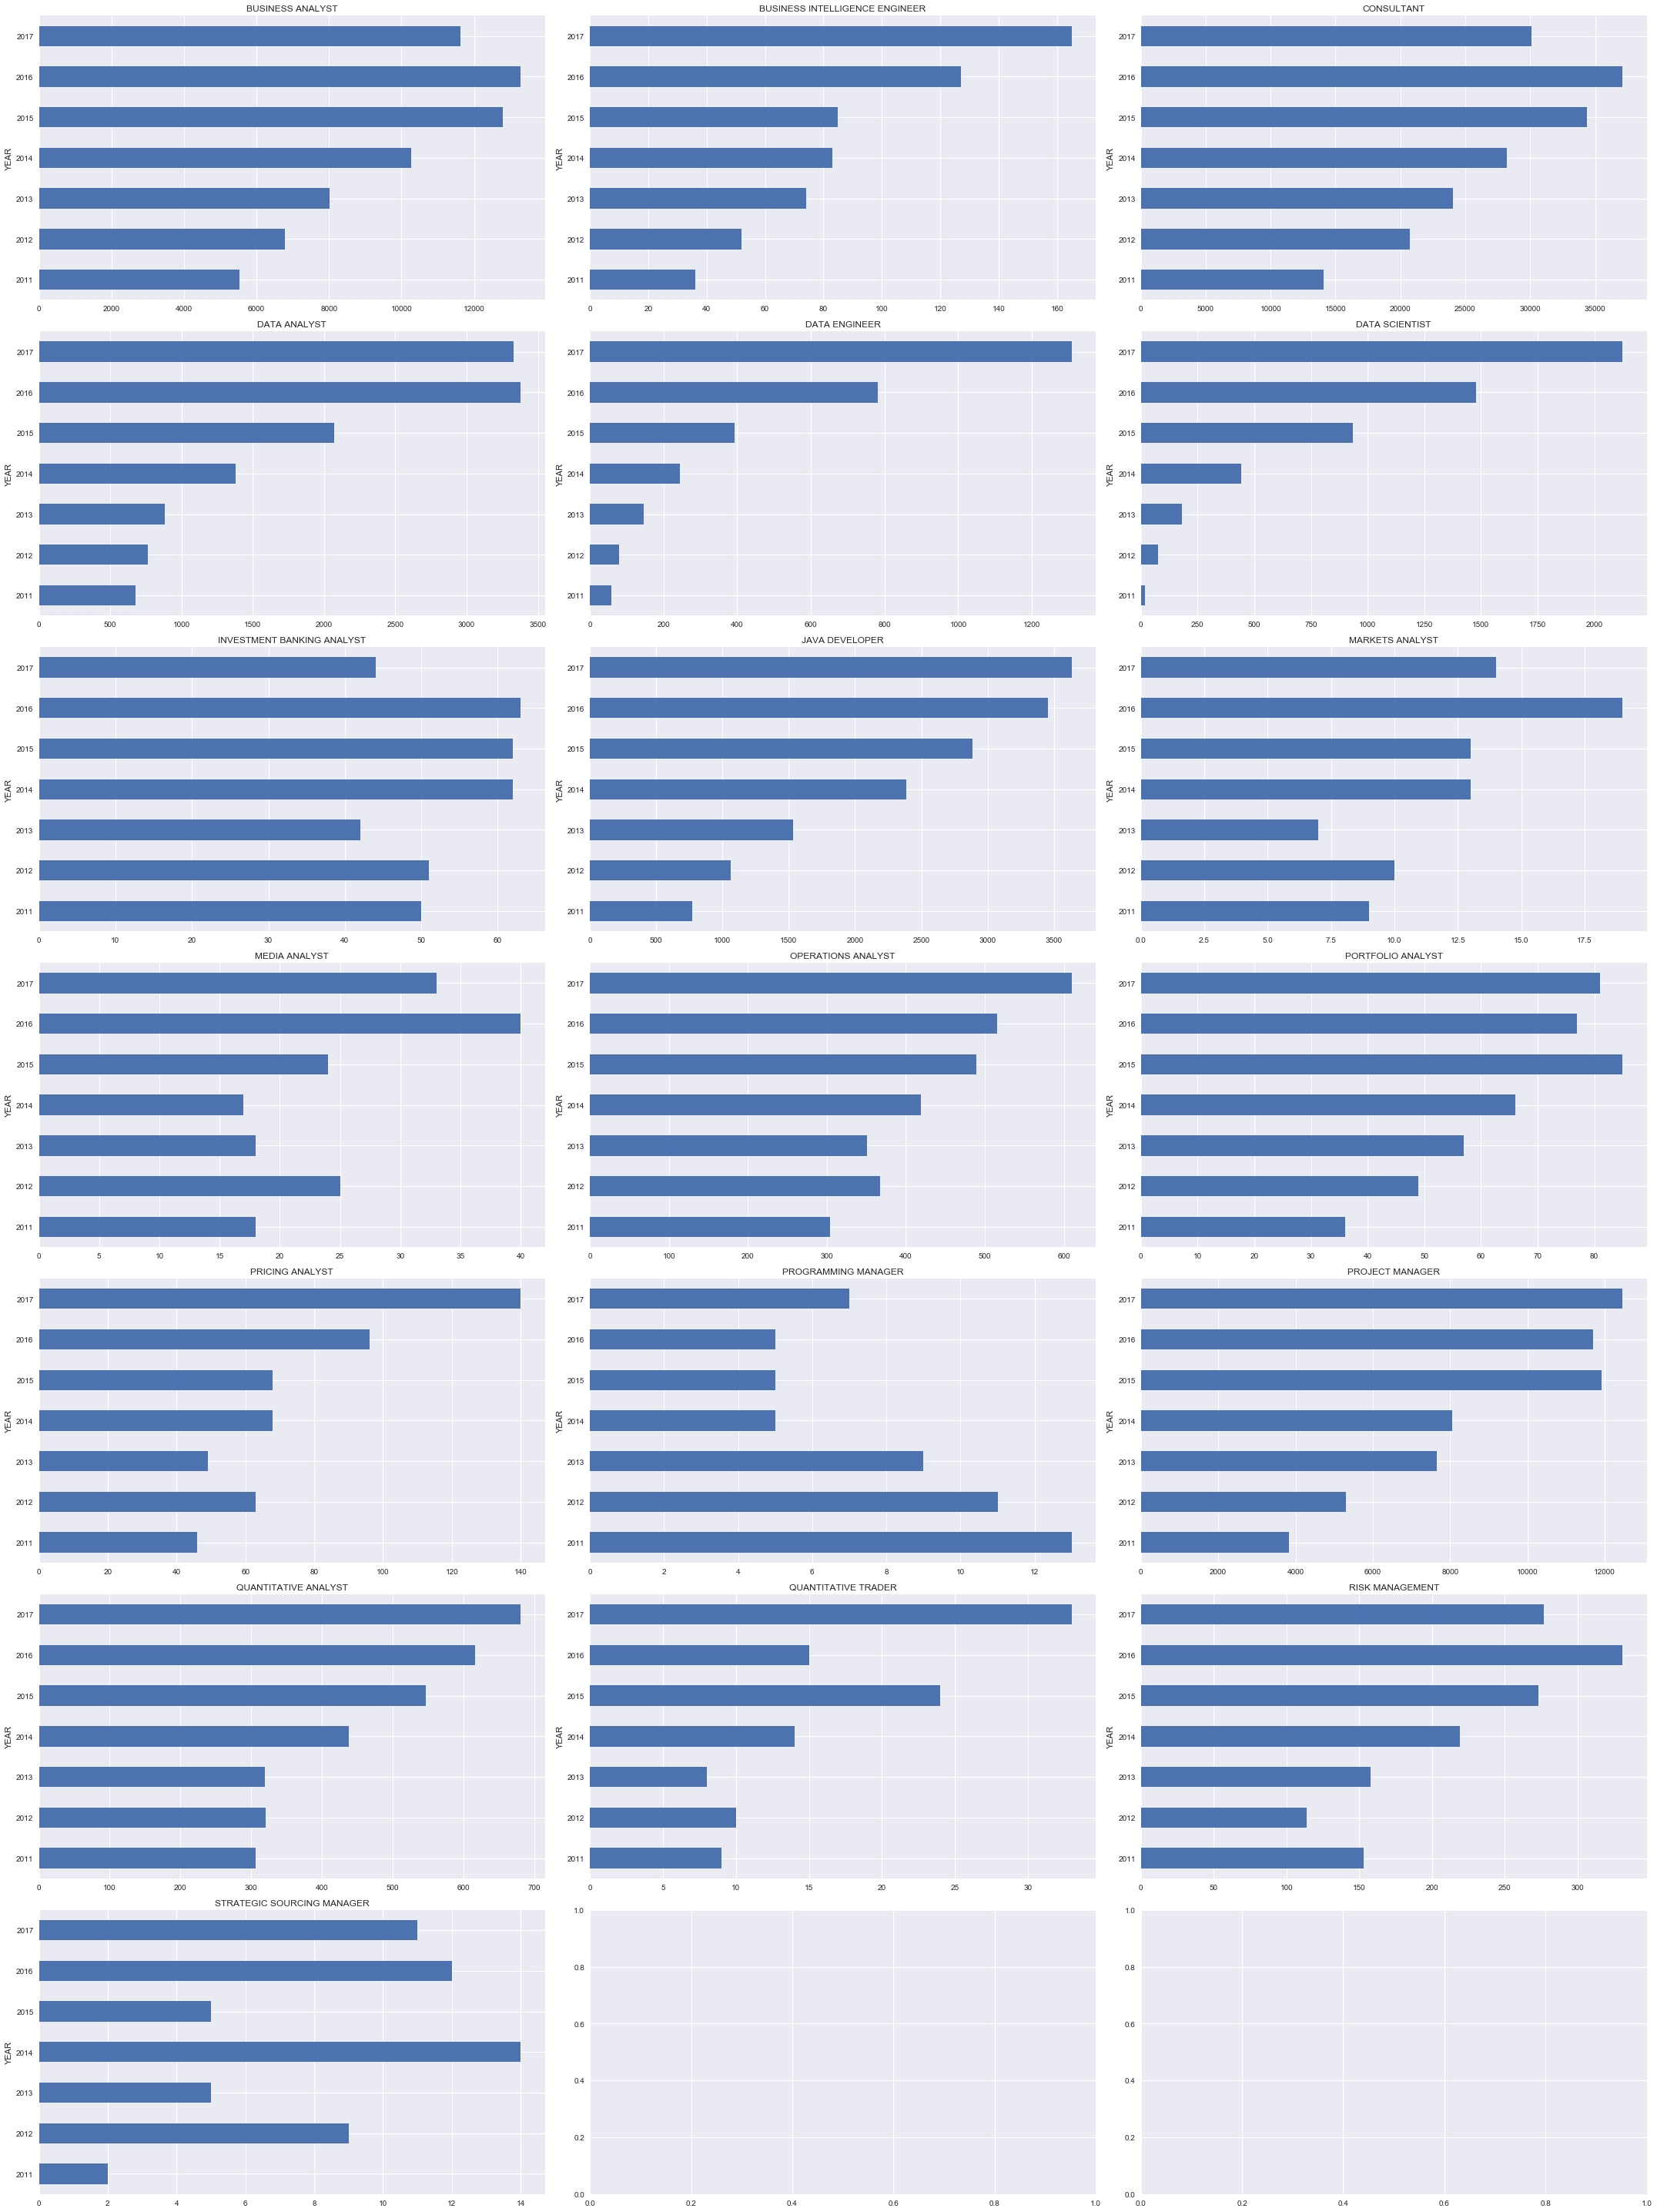

In [206]:
col1="YEAR"
col2="title"
year_state = df3.groupby([col1, col2]).size().unstack()
COL_NUM = 3
ROW_NUM = len(df3[col2].unique())//3+1
import matplotlib.pyplot as plt
fig, axes = plt.subplots(ROW_NUM, COL_NUM, figsize=(30,40))

for i, (col2,col1) in enumerate(year_state.items()): #i is used to position
    ax = axes[int(i/COL_NUM), i%COL_NUM]
    col1= col1
    col1.plot(kind='barh', ax=ax)
    ax.set_title(col2)

plt.tight_layout()
    

# PART II  Wage, Rent & Tax

In [1]:
import pandas as pd

# State format function

In [2]:
us_state_abbrev = {
    'Alabama': 'AL',
    'Alaska': 'AK',
    'Arizona': 'AZ',
    'Arkansas': 'AR',
    'California': 'CA',
    'Colorado': 'CO',
    'Connecticut': 'CT',
    'Delaware': 'DE',
    'Florida': 'FL',
    'Georgia': 'GA',
    'Hawaii': 'HI',
    'Idaho': 'ID',
    'Illinois': 'IL',
    'Indiana': 'IN',
    'Iowa': 'IA',
    'Kansas': 'KS',
    'Kentucky': 'KY',
    'Louisiana': 'LA',
    'Maine': 'ME',
    'Maryland': 'MD',
    'Massachusetts': 'MA',
    'Michigan': 'MI',
    'Minnesota': 'MN',
    'Mississippi': 'MS',
    'Missouri': 'MO',
    'Montana': 'MT',
    'Nebraska': 'NE',
    'Nevada': 'NV',
    'New Hampshire': 'NH',
    'New Jersey': 'NJ',
    'New Mexico': 'NM',
    'New York': 'NY',
    'North Carolina': 'NC',
    'North Dakota': 'ND',
    'Ohio': 'OH',
    'Oklahoma': 'OK',
    'Oregon': 'OR',
    'Pennsylvania': 'PA',
    'Rhode Island': 'RI',
    'South Carolina': 'SC',
    'South Dakota': 'SD',
    'Tennessee': 'TN',
    'Texas': 'TX',
    'Utah': 'UT',
    'Vermont': 'VT',
    'Virginia': 'VA',
    'Washington': 'WA',
    'West Virginia': 'WV',
    'Wisconsin': 'WI',
    'Wyoming': 'WY',
    'DISTRICT OF COLUMBIA':'DC',
    'PUERTO RICO':'PR'
}

In [3]:
def state(x):
    for k, v in us_state_abbrev.items():
        if x.upper() == k.upper():
            x = v
        else:
            x = x
    return x

def state2(x):
    for k, v in us_state_abbrev.items():
        if x.upper() == v.upper():
            x = k
        else:
            x = x
    return x

# Import tax data

In [4]:
tax_data = pd.read_csv('tax.csv')

# Import rent data

In [5]:
rent_data=pd.read_csv('State_MedianRentalPrice_AllHomes.csv')

# Clean rent data

In [6]:
#rent_data_year: annual rent for each state from 2011-2017
#rent_2017: annual rent for each state in 2017

rent_data['2017'] = rent_data['2017-10'] * 12
li = ['RegionName', '2011', '2012', '2013', '2014', '2015', '2016', '2017']
rent_data_year = rent_data[li]
rent_data_year.rename(columns={'2011':'2011Rent', '2012':'2012Rent', '2013':'2013Rent', '2014':'2014Rent', '2015':'2015Rent', '2016':'2016Rent',  'RegionName':'State', '2017':'2017Rent'}, inplace=True)
rent_2017 = rent_data_year[['State', '2017Rent']]

C:\Apps\Anaconda3\lib\site-packages\pandas\core\frame.py:2746: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  **kwargs)


# Import and clean wage data (two H1B datasets)

In [7]:
def clean_total():
    data=pd.read_csv('h1b_kaggle.csv')
    del data["FULL_TIME_POSITION"]
    del data["Unnamed: 0"]
    df=data.dropna()
    df["YEAR"]=df["YEAR"].astype(int)
    df['STATE']=df['WORKSITE'].str.split(',', expand=True)[1]
    df['STATE']=df['STATE'].str.strip()
    df['STATE'] = df['STATE'].apply(state)
    data17 = pd.read_excel("2017_h1b_adjusted.xlsx", sheetname="2017_h1b")
    del data17["FULL_TIME_POSITION"]
    del data17["WORKSITE_CITY"]
    del data17["WORKSITE_COUNTY"]
    data17['YEAR'] = 2017
    data17 = data17.rename(columns = {'WORKSITE_STATE':'STATE'})
    dat = pd.concat([df,data17])
    del dat["WORKSITE"]
    del dat['lat']
    del dat['lon']
    dat = dat[~dat['STATE'].isin(['VI', 'PW', 'GU', 'FM', 'MP'])]
    dat = dat[~dat['CASE_STATUS'].isin(['DENIED'])]
    del dat['Unnamed: 7']
    return dat

wage_data = clean_total()
wage_data['STATE'] = wage_data['STATE'].astype(str)
wage_data['State_name'] = wage_data['STATE'].apply(state2).str.title()

C:\Apps\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Apps\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
C:\Apps\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-

# Table for wage, rent and income tax from 2011-2017

### number of application

In [8]:
application = wage_data.groupby(['State_name','YEAR']).size().unstack()
#wage = wage_data.groupby(['State_name', 'YEAR'])['PREVAILING_WAGE'].mean().round(2)
application = pd.DataFrame(data = application)
application['State'] = application.index
application.iloc[8,7] = 'District of Columbia'
application = application[['State', 2011, 2012, 2013, 2014, 2015, 2016, 2017]]
application = application[~application['State'].isin(['Na', 'Nan'])]
application.index = range(1,53)
application

YEAR,State,2011,2012,2013,2014,2015,2016,2017
1,Alabama,1052.0,1203.0,1217.0,1416.0,1570.0,1799.0,1702.0
2,Alaska,115.0,205.0,197.0,193.0,150.0,151.0,201.0
3,Arizona,3601.0,4865.0,5986.0,6906.0,8397.0,9398.0,9366.0
4,Arkansas,1378.0,1703.0,2277.0,2113.0,2824.0,3216.0,2758.0
5,California,57895.0,70388.0,79916.0,94331.0,112443.0,116665.0,117638.0
6,Colorado,3025.0,3850.0,4446.0,5379.0,6431.0,6170.0,6481.0
7,Connecticut,5139.0,7182.0,6963.0,8347.0,9738.0,9702.0,8045.0
8,Delaware,1958.0,2212.0,3030.0,3078.0,3652.0,3433.0,3328.0
9,District of Columbia,3058.0,3260.0,3442.0,3537.0,3955.0,4004.0,4126.0
10,Florida,12169.0,14087.0,13871.0,16210.0,19167.0,19816.0,21400.0


### Average wage by state

In [9]:
wage = wage_data.groupby(['State_name', 'YEAR'])['PREVAILING_WAGE'].mean().round(2).unstack()
wage = pd.DataFrame(data = wage)
wage['State'] = wage.index
wage.iloc[8,7] = 'District of Columbia'
wage = wage[['State', 2011, 2012, 2013, 2014, 2015, 2016, 2017]]
wage = wage.rename(columns = {2011:'wage2011', 2012:'wage2012', 2013:'wage2013', 2014:'wage2014', 2015:'wage2015', 2016:'wage2016', 2017:'wage2017'})
wage = wage[~wage['State'].isin(['Na', 'Nan'])]
wage.index = range(1,53)
wage

YEAR,State,wage2011,wage2012,wage2013,wage2014,wage2015,wage2016,wage2017
1,Alabama,56922.09,93600.62,62353.08,63015.27,65905.40,139440.03,59895.44
2,Alaska,68732.58,68829.18,71706.44,68739.94,76240.81,73637.75,58644.05
3,Arizona,186524.82,64235.94,65238.63,90111.34,67622.50,69796.41,68531.77
4,Arkansas,52014.07,54226.06,55647.73,60804.53,61250.58,62407.56,60818.28
5,California,93780.74,91808.43,88790.64,113860.56,87116.18,87853.49,87432.48
6,Colorado,66664.17,65660.80,66957.50,69278.67,70491.85,74271.69,73955.75
7,Connecticut,68609.74,68336.03,81390.17,70807.31,73587.06,75650.73,73270.14
8,Delaware,60990.70,66416.37,111067.62,115801.49,69678.96,73279.46,72409.58
9,District of Columbia,65182.61,67122.11,142398.16,70890.04,73374.60,74216.11,72374.26
10,Florida,70720.21,59295.37,91784.27,70733.05,63767.59,69877.80,61884.48


### Annual rent by state

In [10]:
rent_data_year

,State,2011Rent,2012Rent,2013Rent,2014Rent,2015Rent,2016Rent,2017Rent
0,California,24192.5,21438.0,21420.0,23915.0,26795.0,28485.0,31800.0
1,Texas,12900.0,13500.0,13941.0,15923.5,16893.0,16940.0,17940.0
2,New York,35845.0,32447.0,34245.0,35562.5,37326.0,37127.0,39540.0
3,Florida,15450.0,17015.0,18195.0,18864.0,19715.0,20072.5,21540.0
4,Illinois,18615.0,18159.0,18322.5,18759.5,19044.0,18936.0,19140.0
5,Pennsylvania,15620.0,14925.0,15050.0,15365.0,15954.0,15825.0,15600.0
6,Ohio,11479.0,10458.0,10272.0,11279.5,11984.5,12410.0,12300.0
7,Michigan,1600.0,9957.0,10320.0,10909.0,11465.0,12209.0,13200.0
8,Georgia,13270.0,12350.0,12460.0,13025.0,13794.0,14465.0,15600.0
9,North Carolina,12128.5,12080.0,12285.0,12670.0,13110.0,13685.0,15000.0


### Income tax by state

In [11]:
tax_data

,State,Real Estate Tax,Income Tax
0,Alabama,1.42%,5.00%
1,Alaska,3.89%,0.00%
2,Arizona,2.66%,4.54%
3,Arkansas,2.05%,6.90%
4,California,2.65%,9.30%
5,Colorado,1.98%,4.63%
6,Connecticut,6.48%,6.00%
7,Delaware,1.77%,6.60%
8,District of Columbia,1.84%,8.50%
9,Florida,3.49%,0.00%


# Map data

In [12]:
a = application.merge(wage, left_on='State', right_on='State', how='outer')
b = a.merge(rent_data_year, left_on='State', right_on='State', how='outer')
data = b.merge(tax_data, left_on='State', right_on='State', how='outer')
data['State_code'] = data['State'].apply(state)
data = data[~data['State'].isin(['Puerto Rico'])]
data

,State,2011,2012,2013,2014,2015,2016,2017,wage2011,wage2012,...,2011Rent,2012Rent,2013Rent,2014Rent,2015Rent,2016Rent,2017Rent,Real Estate Tax,Income Tax,State_code
0,Alabama,1052.0,1203.0,1217.0,1416.0,1570.0,1799.0,1702.0,56922.09,93600.62,...,11752.0,10578.0,10400.0,11025.0,11275.0,11697.0,11940.0,1.42%,5.00%,AL
1,Alaska,115.0,205.0,197.0,193.0,150.0,151.0,201.0,68732.58,68829.18,...,17170.0,18042.5,18515.0,19370.0,20157.5,19660.0,19200.0,3.89%,0.00%,AK
2,Arizona,3601.0,4865.0,5986.0,6906.0,8397.0,9398.0,9366.0,186524.82,64235.94,...,13504.0,13175.0,13134.0,13815.0,14680.0,15019.0,16200.0,2.66%,4.54%,AZ
3,Arkansas,1378.0,1703.0,2277.0,2113.0,2824.0,3216.0,2758.0,52014.07,54226.06,...,10450.0,10587.5,11000.0,11640.0,11984.0,12190.0,12000.0,2.05%,6.90%,AR
4,California,57895.0,70388.0,79916.0,94331.0,112443.0,116665.0,117638.0,93780.74,91808.43,...,24192.5,21438.0,21420.0,23915.0,26795.0,28485.0,31800.0,2.65%,9.30%,CA
5,Colorado,3025.0,3850.0,4446.0,5379.0,6431.0,6170.0,6481.0,66664.17,65660.80,...,11415.0,15194.5,15772.0,17009.0,19454.0,20365.0,21600.0,1.98%,4.63%,CO
6,Connecticut,5139.0,7182.0,6963.0,8347.0,9738.0,9702.0,8045.0,68609.74,68336.03,...,21757.5,19175.0,19210.0,20535.0,20582.5,20145.0,20400.0,6.48%,6.00%,CT
7,Delaware,1958.0,2212.0,3030.0,3078.0,3652.0,3433.0,3328.0,60990.70,66416.37,...,15107.5,14500.0,15175.0,15096.0,15582.5,15745.0,15600.0,1.77%,6.60%,DE
8,District of Columbia,3058.0,3260.0,3442.0,3537.0,3955.0,4004.0,4126.0,65182.61,67122.11,...,28627.5,28558.0,29367.0,29495.0,30100.0,30420.0,30720.0,1.84%,8.50%,DC
9,Florida,12169.0,14087.0,13871.0,16210.0,19167.0,19816.0,21400.0,70720.21,59295.37,...,15450.0,17015.0,18195.0,18864.0,19715.0,20072.5,21540.0,3.49%,0.00%,FL


# Maps

In [13]:
import plotly.plotly as py
import pandas as pd
%matplotlib inline
py.sign_in('jd3365', '8fCUjamQ8QtWCi5XVXsD')

for col in data.columns:
    data[col] = data[col].astype(str)

scl = [[0.0, 'rgb(242,240,247)'],[0.2, 'rgb(218,218,235)'],[0.4, 'rgb(188,189,220)'],
            [0.6, 'rgb(158,154,200)'],[0.8, 'rgb(117,107,177)'],[1.0, 'rgb(84,39,143)']]

data['text'] = data['State'] + '<br>'\
                    + ' 2017 Application Amount: ' + data[2017] + '<br>'\
                    + ' 2017 Average Wage: ' + data['wage2017'] + '<br>'\
                    + ' 2017 Average Rent: ' + data['2017Rent'] + '<br>'\
                    + ' 2017 Income Tax: ' + data['Income Tax']


mapdata = [ dict(
        type='choropleth',
        colorscale = scl,
        autocolorscale = False,
        locations = data['State_code'],
        z = data[2017],
        locationmode = 'USA-states',
        text = data['text'],
        marker = dict(
            line = dict (
                color = 'rgb(255,255,255)',
                width = 2
            ) ),
        colorbar = dict(
            title = "Application Amount")
        ) ]

layout = dict(
        title = '2017 Application Amount by State ',
        geo = dict(
            scope='usa',
            projection=dict( type='albers usa' ),
            showlakes = True,
            lakecolor = 'rgb(255, 255, 255)'),
             )
    
fig = dict(data=mapdata, layout=layout )
py.iplot(fig)

In [14]:
import plotly.plotly as py
import pandas as pd
%matplotlib inline
py.sign_in('jd3365', '8fCUjamQ8QtWCi5XVXsD')

for col in data.columns:
    data[col] = data[col].astype(str)

scl = [[0.0, 'rgb(242,240,247)'],[0.2, 'rgb(218,218,235)'],[0.4, 'rgb(188,189,220)'],
            [0.6, 'rgb(158,154,200)'],[0.8, 'rgb(117,107,177)'],[1.0, 'rgb(84,39,143)']]

data['text'] = data['State'] + '<br>'\
                    + ' 2017 Application Amount: ' + data[2017] + '<br>'\
                    + ' 2017 Average Wage: ' + data['wage2017'] + '<br>'\
                    + ' 2017 Average Rent: ' + data['2017Rent'] + '<br>'\
                    + ' 2017 Income Tax: ' + data['Income Tax']


mapdata = [ dict(
        type='choropleth',
        colorscale = scl,
        autocolorscale = False,
        locations = data['State_code'],
        z = data['wage2017'],
        locationmode = 'USA-states',
        text = data['text'],
        marker = dict(
            line = dict (
                color = 'rgb(255,255,255)',
                width = 2
            ) ),
        colorbar = dict(
            title = "Application Amount")
        ) ]

layout = dict(
        title = '2017 Annual Income by State ',
        geo = dict(
            scope='usa',
            projection=dict( type='albers usa' ),
            showlakes = True,
            lakecolor = 'rgb(255, 255, 255)'),
             )
    
fig = dict(data=mapdata, layout=layout )
py.iplot(fig)

In [15]:
import plotly.plotly as py
import pandas as pd
%matplotlib inline
py.sign_in('jd3365', '8fCUjamQ8QtWCi5XVXsD')

for col in data.columns:
    data[col] = data[col].astype(str)

scl = [[0.0, 'rgb(242,240,247)'],[0.2, 'rgb(218,218,235)'],[0.4, 'rgb(188,189,220)'],
            [0.6, 'rgb(158,154,200)'],[0.8, 'rgb(117,107,177)'],[1.0, 'rgb(84,39,143)']]

data['text'] = data['State'] + '<br>'\
                    + ' 2017 Application Amount: ' + data[2017] + '<br>'\
                    + ' 2017 Average Wage: ' + data['wage2017'] + '<br>'\
                    + ' 2017 Average Rent: ' + data['2017Rent'] + '<br>'\
                    + ' 2017 Income Tax: ' + data['Income Tax']


mapdata = [ dict(
        type='choropleth',
        colorscale = scl,
        autocolorscale = False,
        locations = data['State_code'],
        z = pd.to_numeric(data['Income Tax'].str.strip('%'), downcast='float'),
        locationmode = 'USA-states',
        text = data['text'],
        marker = dict(
            line = dict (
                color = 'rgb(255,255,255)',
                width = 2
            ) ),
        colorbar = dict(
            title = "Income Tax")
        ) ]

layout = dict(
        title = '2017 High Income Tax by State ',
        geo = dict(
            scope='usa',
            projection=dict( type='albers usa' ),
            showlakes = True,
            lakecolor = 'rgb(255, 255, 255)'),
             )
    
fig = dict(data=mapdata, layout=layout )
py.iplot(fig)

In [16]:
import plotly.plotly as py
import pandas as pd
%matplotlib inline
py.sign_in('jd3365', '8fCUjamQ8QtWCi5XVXsD')

for col in data.columns:
    data[col] = data[col].astype(str)

scl = [[0.0, 'rgb(242,240,247)'],[0.2, 'rgb(218,218,235)'],[0.4, 'rgb(188,189,220)'],
            [0.6, 'rgb(158,154,200)'],[0.8, 'rgb(117,107,177)'],[1.0, 'rgb(84,39,143)']]

data['text'] = data['State'] + '<br>'\
                    + ' 2017 Application Amount: ' + data[2017] + '<br>'\
                    + ' 2017 Average Wage: ' + data['wage2017'] + '<br>'\
                    + ' 2017 Average Rent: ' + data['2017Rent'] + '<br>'\
                    + ' 2017 Income Tax: ' + data['Income Tax']


mapdata = [ dict(
        type='choropleth',
        colorscale = scl,
        autocolorscale = False,
        locations = data['State_code'],
        z = pd.to_numeric(data['2017Rent'], downcast='float'),
        locationmode = 'USA-states',
        text = data['text'],
        marker = dict(
            line = dict (
                color = 'rgb(255,255,255)',
                width = 2
            ) ),
        colorbar = dict(
            title = "Annual Rent")
        ) ]

layout = dict(
        title = '2017 Annual Rent by State ',
        geo = dict(
            scope='usa',
            projection=dict( type='albers usa' ),
            showlakes = True,
            lakecolor = 'rgb(255, 255, 255)'),
             )
    
fig = dict(data=mapdata, layout=layout )
py.iplot(fig)

# Graphs

In [17]:
del data['text']
pdata = data[~data['State'].isin(['Na', 'Nan'])]
pdata['Income Tax'] = pd.to_numeric(pdata['Income Tax'].str.strip('%'), downcast='float')
pdata.index = pdata['State_code']
del pdata['State']
del pdata['State_code']
del pdata['Real Estate Tax']
pdata = pdata.astype(float)
pdata['2011 Income after Rent'] = pdata['wage2011'] - pdata['2011Rent']
pdata['2012 Income after Rent'] = pdata['wage2012'] - pdata['2012Rent']
pdata['2013 Income after Rent'] = pdata['wage2013'] - pdata['2013Rent']
pdata['2014 Income after Rent'] = pdata['wage2014'] - pdata['2014Rent']
pdata['2015 Income after Rent'] = pdata['wage2015'] - pdata['2015Rent']
pdata['2016 Income after Rent'] = pdata['wage2016'] - pdata['2016Rent']
pdata['2017 Income after Rent'] = pdata['wage2017'] - pdata['2017Rent']
pdata['2017 Rent % in Income'] = (pdata['2017Rent'] * 100 / pdata['wage2017']).round(2)

# Wage vs Income Tax

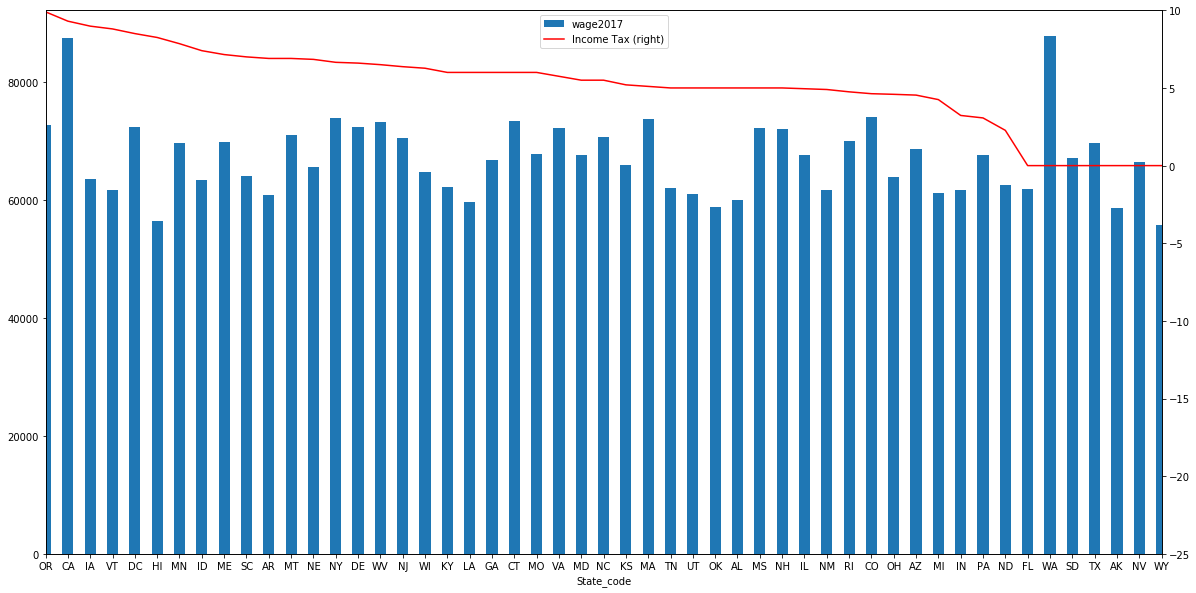

In [18]:
import pandas as pd
import numpy as np

df = pd.DataFrame(pdata, columns=['wage2017', 'Income Tax']).sort_values(by = 'Income Tax', ascending=False)
ax1 = df.plot(kind='bar', x=df.index, y='wage2017', figsize = (20, 10))    
ax2 = df.plot(kind='line', x=df.index, y='Income Tax', color='r', ax=ax1, secondary_y=True)    
ax2.set_ylim(-25,10)
ax2

# Application Amount vs Income Tax

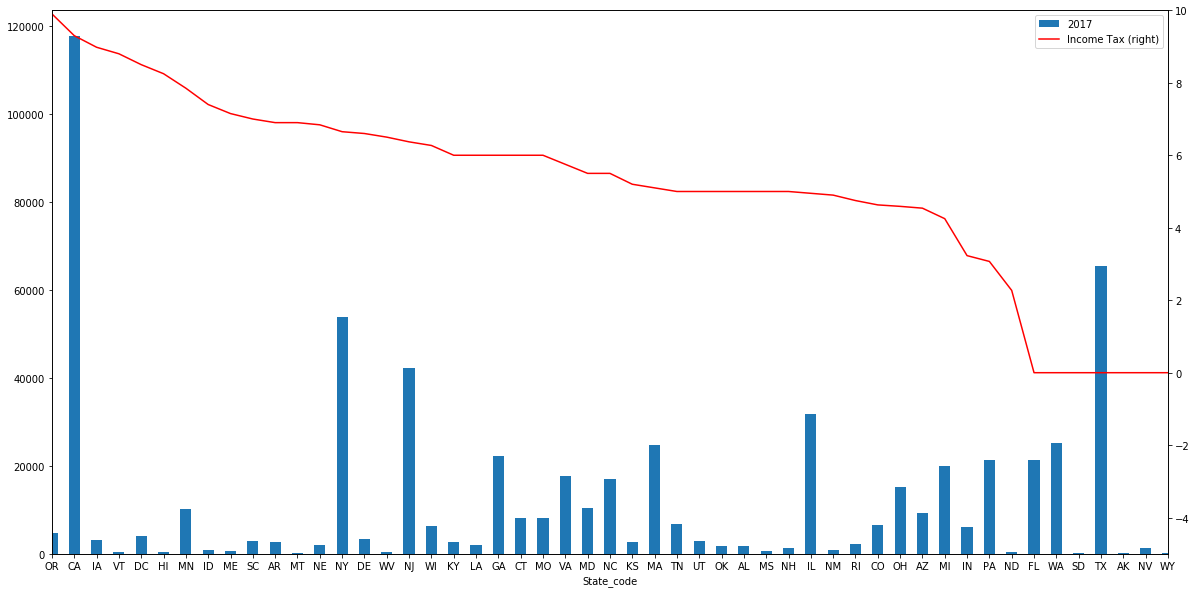

In [19]:
import pandas as pd
import numpy as np

df3 = pd.DataFrame(pdata, columns=[2017, 'Income Tax']).sort_values(by = 'Income Tax', ascending=False)
ax1 = df3.plot(kind='bar', x=df3.index, y=2017, figsize = (20, 10))    
ax2 = df3.plot(kind='line', x=df3.index, y='Income Tax', color='r', ax=ax1, secondary_y=True)    
ax2.set_ylim(-5,10)
ax2

## Application Amount vs Rent

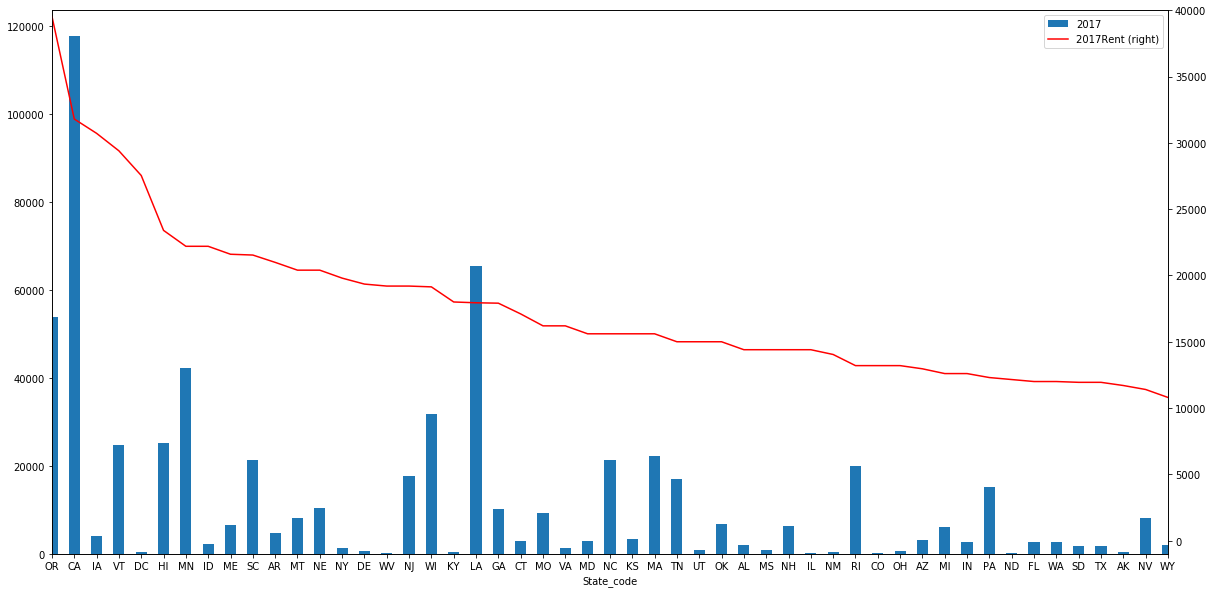

In [20]:
import pandas as pd
import numpy as np

df2 = pd.DataFrame(pdata, columns=[2017, '2017Rent']).sort_values(by = '2017Rent', ascending=False)
ax1 = df2.plot(kind='bar', x=df.index, y = 2017, figsize = (20, 10))    
ax2 = df2.plot(kind='line', x=df.index, y= '2017Rent', color='r', ax=ax1, secondary_y=True)    
ax2.set_ylim(-1000,40000)
ax2

## Income After Rent Paid

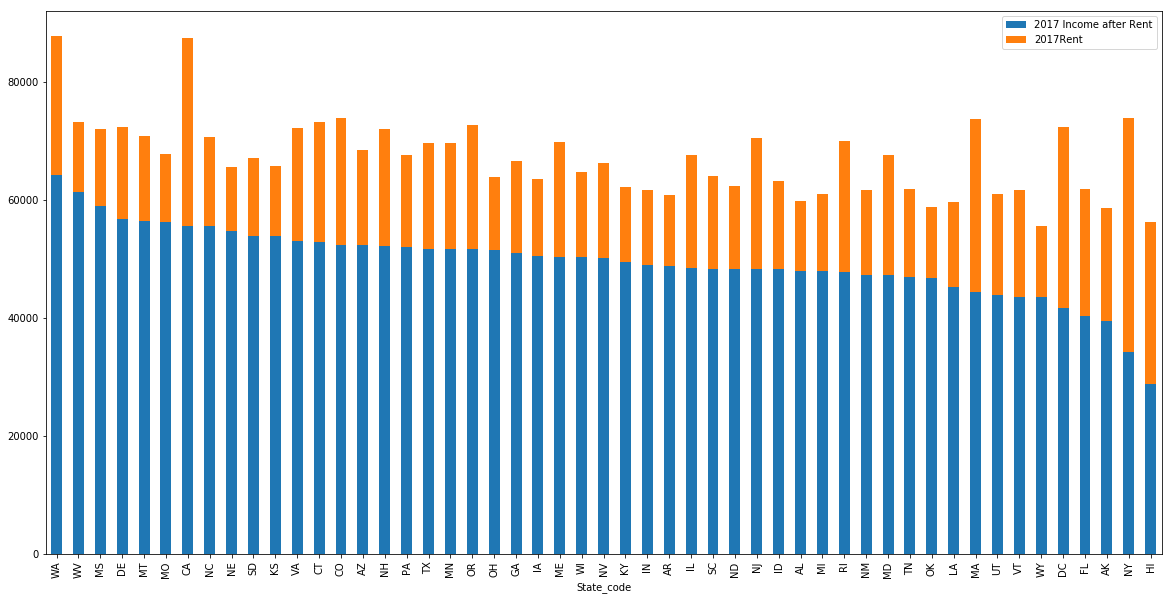

In [21]:
import numpy as np
df1 = pd.DataFrame(pdata, columns= ['2017 Income after Rent', '2017Rent']).sort_values(by = '2017 Income after Rent', ascending=False)
df1.plot.bar(figsize = (20, 10), stacked = True)

## Percentage of Income for Rent

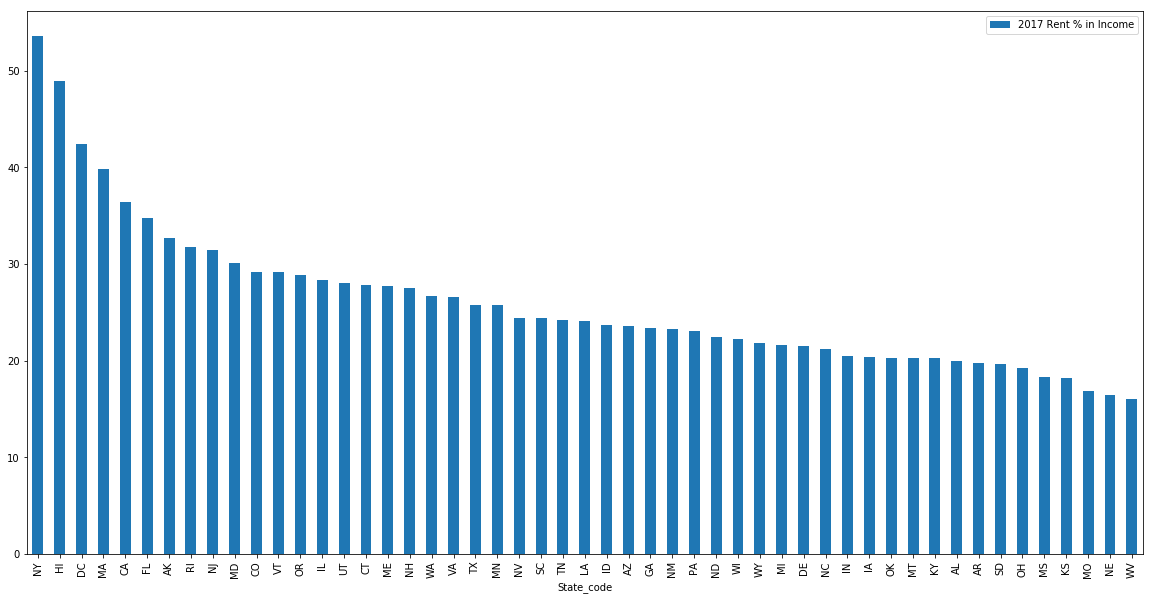

In [22]:
import numpy as np
df4 = pd.DataFrame(pdata, columns= ['2017 Rent % in Income']).sort_values(by = '2017 Rent % in Income', ascending=False)
df4.plot.bar(figsize = (20, 10))

## Income After Rent Paid (by state)

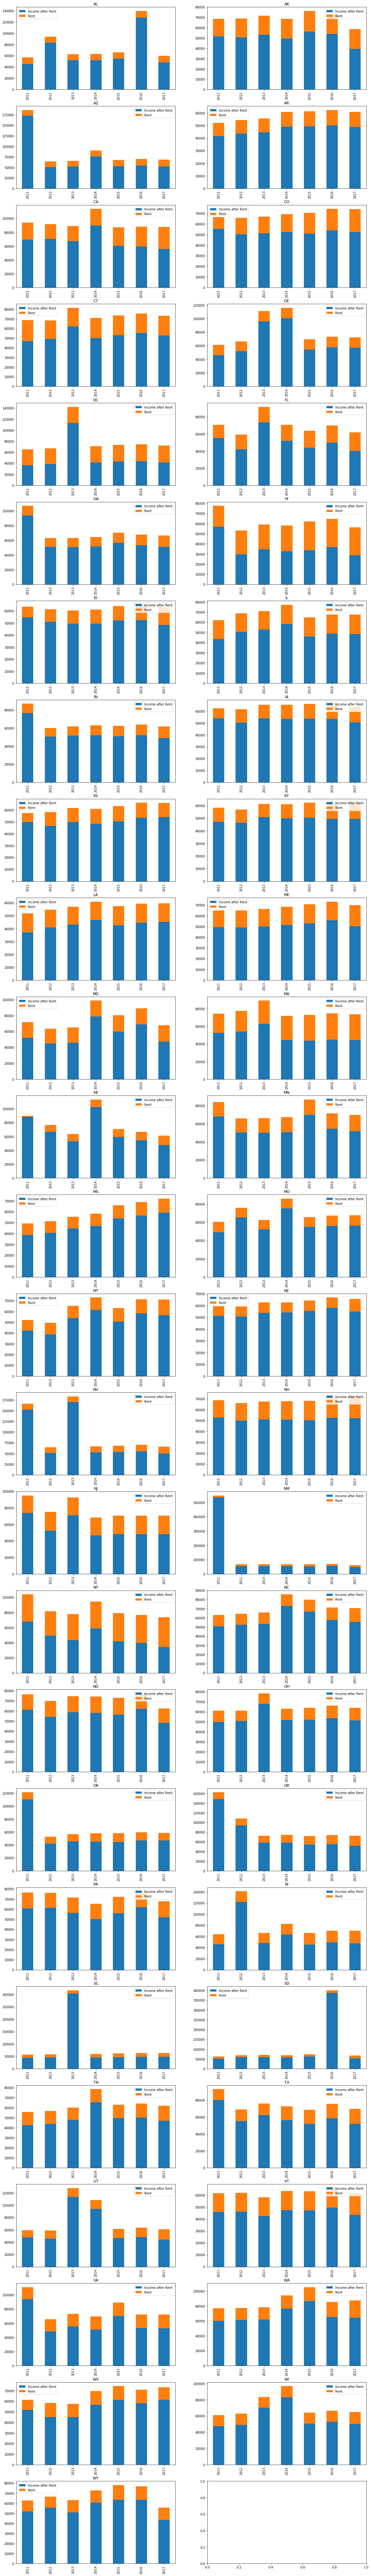

In [23]:
ptdata = pdata.transpose()
pt1= ptdata.iloc[14:29]
COL_NUM = 2
ROW_NUM = 26
import matplotlib.pyplot as plt
fig, axes = plt.subplots(ROW_NUM, COL_NUM)
i = 0

for column in pt1:
    ptable = pt1[column].values
    income = []
    rent = []
    for x in ptable[0:7]:
        rent.append(x)
    for y in ptable[8:15]:
        income.append(y)   
    d = {'Income after Rent': income, 'Rent': rent}
    plot_table = pd.DataFrame(data = d, index = [2011, 2012, 2013, 2014, 2015, 2016, 2017])
    ax = axes[int(i/COL_NUM), i%COL_NUM]
    plot = plot_table.plot.bar(stacked = True, ax = ax, figsize = (20, 150))
    ax.set_title(column)
    i = i + 1
plot 

# Part III  Indeed Data

## Import Data

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.cm as cm
plt.style.use('seaborn')#looks nicer
import geopandas as gpd
import seaborn as sns
import pymysql

In [2]:
def state(x):
    us_state_abbrev = {
    'Alabama': 'AL',
    'Alaska': 'AK',
    'Arizona': 'AZ',
    'Arkansas': 'AR',
    'California': 'CA',
    'Colorado': 'CO',
    'Connecticut': 'CT',
    'Delaware': 'DE',
    'Florida': 'FL',
    'Georgia': 'GA',
    'Hawaii': 'HI',
    'Idaho': 'ID',
    'Illinois': 'IL',
    'Indiana': 'IN',
    'Iowa': 'IA',
    'Kansas': 'KS',
    'Kentucky': 'KY',
    'Louisiana': 'LA',
    'Maine': 'ME',
    'Maryland': 'MD',
    'Massachusetts': 'MA',
    'Michigan': 'MI',
    'Minnesota': 'MN',
    'Mississippi': 'MS',
    'Missouri': 'MO',
    'Montana': 'MT',
    'Nebraska': 'NE',
    'Nevada': 'NV',
    'New Hampshire': 'NH',
    'New Jersey': 'NJ',
    'New Mexico': 'NM',
    'New York': 'NY',
    'North Carolina': 'NC',
    'North Dakota': 'ND',
    'Ohio': 'OH',
    'Oklahoma': 'OK',
    'Oregon': 'OR',
    'Pennsylvania': 'PA',
    'Rhode Island': 'RI',
    'South Carolina': 'SC',
    'South Dakota': 'SD',
    'Tennessee': 'TN',
    'Texas': 'TX',
    'Utah': 'UT',
    'Vermont': 'VT',
    'Virginia': 'VA',
    'Washington': 'WA',
    'West Virginia': 'WV',
    'Wisconsin': 'WI',
    'Wyoming': 'WY',
    'DISTRICT OF COLUMBIA':'DC',
    'PUERTO RICO':'PR'
    }
    
    for k, v in us_state_abbrev.items():
        if x ==k.upper():
            x=v
        else:
            x=x
    return x

In [3]:
def clean_total():
    data=pd.read_csv('h1b_kaggle.csv')
    del data["FULL_TIME_POSITION"]
    del data["Unnamed: 0"]
    del data['CASE_STATUS']
    df=data.dropna()
    df["YEAR"]=df["YEAR"].astype(int)
    df['STATE']=df['WORKSITE'].str.split(',', expand=True)[1]
    df['STATE']=df['STATE'].str.strip()
    df['STATE'] = df['STATE'].apply(state)
    data17 = pd.read_excel("2017_h1b_adjusted.xlsx", sheetname="2017_h1b")
    del data17["FULL_TIME_POSITION"]
    del data17["WORKSITE_CITY"]
    del data17["WORKSITE_COUNTY"]
    del data17["CASE_STATUS"]
    data17['YEAR'] = 2017
    data17=data17.rename(columns = {'WORKSITE_STATE':'STATE'})
    dat=pd.concat([df,data17])
    del dat["WORKSITE"]
    del dat['lat']
    del dat['lon']
    dat=dat[~dat['STATE'].isin(['VI', 'PW', 'GU', 'FM', 'MP'])]
    return dat

In [4]:
dat = clean_total()

/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing

## Analyze Indeed Skill Data

In [5]:
import os
from werkzeug.utils import secure_filename

from flask import Flask

from flask import session, url_for, render_template , request, redirect
from wtforms import SelectField

#from flask.ext.mysql import MySQL

from wtforms.fields.html5 import DateField
from datetime import date

from flask_wtf import FlaskForm

#from flaskext.mysql import MySQL
from flask_wtf import Form
from wtforms.fields.html5 import DateField,IntegerField
from wtforms import SelectField, RadioField, BooleanField,validators


from datetime import date

import numpy as np 
import pandas as pd
import nltk
from nltk.tokenize import RegexpTokenizer
from nltk.stem.porter import PorterStemmer
from nltk import sent_tokenize,word_tokenize
from nltk.corpus import PlaintextCorpusReader
from nltk.corpus import stopwords
from nltk.probability import FreqDist
#from nltk.util import ngrams
from sklearn.feature_extraction.text import CountVectorizer
from nltk.collocations import BigramCollocationFinder
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt


UPLOAD_FOLDER = '/Users/mengranzhang/Desktop/DA/Project/Flask/Indeed-output'

# app = Flask(__name__)
# app.config['UPLOAD_FOLDER'] = UPLOAD_FOLDER

# app.secret_key = 'A0Zr98slkjdf984jnflskj_sdkfjhT'

class TextAnalysis:
#change the directory to the one that includes indeed-scrap-output1 file
    #os.chdir('C:\\Users\\chen liu\\Desktop\\Columbia\\17fall\Data Analytics\\Final project')   
    junk_words=['contact','us','about','email','address','first','name','last', 'job', 'all', 'search','terms','conditions','our', 'more', 'sign','jobs','ny','york','united'
                ,'states','san','francisco','privacy','term','san','years']
    junk_words.extend(stopwords.words())
    # r subject to change to the capitalized one
    programming_skills=['excel','vba','python','r','matlab','c#','c++','sas','stata','sql','mysql','php','html','java','javascript',
    'ios','perl','hadoop','nosql','hive','mapreduce','pip','mongodb','hbase','tableau','spark','scala','d3']
    

    
    def __init__(self,value,junk=junk_words,p=programming_skills,path = UPLOAD_FOLDER):
        self.value=value
        self.junk_words=junk
        self.programming=p
        root= path + '/' + self.value
        files=self.value+'.*'
        text =PlaintextCorpusReader(root,files)
        self.corpus=text

  #  def  dataclean()
 # text is the output of read_corpus function       
    def bag_of_words(self,toprank=20):
        tokenizer=RegexpTokenizer(r'\w+')
        newtext=self.corpus.raw()
        tokens=tokenizer.tokenize(newtext)
        p_stemmer=PorterStemmer() 
        Output=[p_stemmer.stem(word.lower()) for word in tokens if word.lower() not in self.junk_words and word.isalpha()]
        word_freq=FreqDist(Output).most_common(toprank)
        words=[i[0] for i in word_freq]
        self.words=words


    def bag_of_bigrams(self,toprank=20):
        tokenizer=RegexpTokenizer(r'\w+')
        newtext=self.corpus.raw()
        tokens=tokenizer.tokenize(newtext)        
        words=[word.lower()for word in tokens if word.lower() not in self.junk_words and word.isalpha()]
        bigram_measures = nltk.collocations.BigramAssocMeasures()
        finder = BigramCollocationFinder.from_words(words)
        scored = finder.score_ngrams(bigram_measures.raw_freq)
        freq=sorted(scored,key=lambda scored:scored[1],reverse=True)[:toprank]
    #        vectorizer=CountVectorizer(ngram_range=(1,2))
    #        bag_of_words=vectorizer.fit_transform(words)
    #        freq=sum(bag_of_words).toarray()[0]
            #df=pd.DataFrame(freq,index=bag_of_words.get_feature_name(),columns=['freqency'])
            #bigram=df.sort_values(by=['frequency'])[:toprank].index.values
            #self.bigram=bigram
        bigram=[ rank[0] for rank in freq]
        self.bigram=bigram

       # return bigram,freq
  
            
            
    def programming_skill(self):
    #       with open(os.getcwd()+'\\indeed-scrap-output-full\\output\\'+self.value,'r') as f:
    #          data=f.read().replace('\n','')
    #       import operator
        newtext=self.corpus.raw()
        tokenizer=RegexpTokenizer(r'\w+')
        tokens=tokenizer.tokenize(newtext)
        words=[word.lower()for word in tokens if word.lower() not in self.junk_words and word.isalpha()]
        skill_dict=dict(zip(self.programming,[0]*len(self.programming)))
        for i in words:
            if i in skill_dict.keys():
                skill_dict[i]+=1
            else:
                pass        
      #  skills=sorted(skill_dict.items(),key=operator.itemgetter(1),reverse=True)
        total= sum(skill_dict.values())
        skills={key.capitalize():value/total for key,value in skill_dict.items()}     
        skills_freq={key.capitalize():value/total for key,value in skill_dict.items() if value is not 0} 
        pd.options.display.float_format='{:.2%}'.format  
        skills_freq=pd.Series(skills_freq).sort_values(ascending=False)
        self.skills=skills
        self.skills_fq=skills_freq





    #def network(self,other)   

    def draw_wordcloud(self,max_words=20):
		#remove short words 
        skills=dict(self.skills_fq)
        skills_new={key.capitalize():value for key,value in skills.items() if value is not 0}   

		#        newtext=self.corpus.raw()
		#        tokenizer=RegexpTokenizer(r'\w+')
		#        tokens =tokenizer.tokenize(newtext)
		# words=[word.lower()for word in tokens if word.lower() not in self.junk_words and word.isalpha()]
        wordcloud =WordCloud(background_color='white',width=800,height=600,max_words=max_words).fit_words(skills_new)
        plt.imshow(wordcloud)
        plt.axis('off')
#         plt.savefig('static/wordcloud.png')
        plt.show()
        
    def draw_bigram(self,max_words=20):
		#remove short wordse short words 
		#    bigram=dict(self.bigram)

		# bigram_new={key:value for key,value in skills.items() if value is not 0}   

		#        newtext=self.corpus.raw()
		#        tokenizer=RegexpTokenizer(r'\w+')
		#        tokens =tokenizer.tokenize(newtext)
		# words=[word.lower()for word in tokens if word.lower() not in self.junk_words and word.isalpha()]
        wordcloud =WordCloud(stopwords=self.junk_words,background_color='white',width=1200,height=1000,max_words=max_words).generate(self.corpus.raw())
        plt.imshow(wordcloud)
        plt.axis('off')
#         plt.savefig('static/bigram.png')
        plt.show()
        

In [6]:
from __future__ import print_function
from IPython.display import display
from ipywidgets import interact, Layout, interactive, fixed, interact_manual
import ipywidgets as widgets

## IEOR 19 TOP JOB TITLES & SKILLS

In [7]:
skill_list = ['excel','vba','python','r','matlab','c#','c++','sas','stata','sql','mysql','php','html','java','javascript',
    'ios','perl','hadoop','nosql','hive','mapreduce','pip','mongodb','hbase','tableau','spark','scala','d3']


In [8]:
job_title_sk = ['Business Analyst','Business Intelligence Engineer','Consultant','Data Analyst',
                   'Data Engineer','Data Scientist','Global Markets Analyst','Investment Banking Analyst',
                   'Java Developer','Media Analyst','Operations Analyst','Portfolio Analyst',
                   'Pricing Analyst','Program Manager','Project Manager','Quantitative Analyst','Quantitative Trader',
                   'Risk Management','Strategic Sourcing Manager']

In [9]:
dict_skillset = dict()
for x in job_title_sk:
    ta = TextAnalysis(x)
    ta.programming_skill() 
    dict_skillset[x] = ta.skills_fq
    

In [10]:
skilldf = pd.DataFrame(data=dict_skillset)
skilldf = skilldf.fillna(0)
skilldf

,Business Analyst,Business Intelligence Engineer,Consultant,Data Analyst,Data Engineer,Data Scientist,Global Markets Analyst,Investment Banking Analyst,Java Developer,Media Analyst,Operations Analyst,Portfolio Analyst,Pricing Analyst,Program Manager,Project Manager,Quantitative Analyst,Quantitative Trader,Risk Management,Strategic Sourcing Manager
Excel,25.76%,2.71%,30.48%,15.15%,1.47%,2.80%,36.42%,71.43%,0.35%,33.01%,31.72%,62.33%,43.04%,36.61%,40.04%,24.01%,18.80%,37.84%,62.90%
Hadoop,1.01%,10.54%,1.87%,4.99%,11.17%,9.49%,0.66%,0.00%,1.24%,0.96%,0.20%,0.00%,0.00%,2.95%,1.52%,0.00%,0.00%,0.76%,0.00%
Hbase,0.00%,2.11%,0.17%,0.30%,2.01%,0.78%,0.00%,0.00%,0.18%,0.00%,0.00%,0.00%,0.00%,1.34%,0.97%,0.00%,0.00%,0.00%,0.00%
Hive,0.67%,5.12%,0.34%,2.29%,3.32%,3.58%,0.00%,0.00%,0.22%,1.44%,0.61%,0.00%,0.63%,0.62%,0.41%,0.72%,0.00%,0.54%,0.00%
Html,1.77%,1.81%,2.89%,0.72%,1.59%,0.62%,0.00%,0.00%,3.31%,2.39%,4.24%,0.00%,0.00%,4.20%,4.36%,1.08%,0.00%,0.65%,0.00%
Ios,1.09%,0.00%,1.95%,0.42%,0.23%,0.08%,0.00%,0.00%,0.49%,0.00%,1.62%,0.00%,0.00%,3.57%,3.11%,0.36%,0.00%,0.54%,0.00%
Java,3.28%,6.93%,5.18%,2.92%,11.74%,5.91%,1.99%,0.00%,63.94%,0.48%,1.82%,2.05%,0.00%,8.30%,8.64%,3.94%,7.69%,1.95%,1.61%
Javascript,4.21%,4.82%,9.25%,2.62%,4.93%,1.95%,3.97%,0.00%,9.32%,2.87%,1.41%,0.68%,0.00%,10.62%,8.37%,2.15%,0.00%,4.76%,9.68%
Mapreduce,0.17%,0.60%,0.17%,0.72%,1.90%,1.01%,0.00%,0.00%,0.18%,0.48%,0.00%,0.00%,0.00%,0.36%,0.21%,0.36%,0.00%,0.32%,0.00%
Matlab,0.17%,0.90%,0.68%,1.35%,0.79%,3.81%,3.97%,0.00%,0.04%,0.96%,0.81%,2.74%,1.27%,0.00%,0.14%,6.09%,9.40%,2.70%,0.00%


In [11]:
skilldf['skill'] = skilldf.index.str.lower()

## Input Your Skills!

In [12]:
w = widgets.SelectMultiple(
    options=skill_list,
    value=['excel'],
    #rows=10,
    description='Programming Skills',
    disabled=False,
    rows = 20,
    layout= Layout(display="flex", flex_flow='column'))

display(w)

In [13]:
w.value

('python', 'r', 'sql', 'mysql')

In [14]:
wlist = []
for x in w.value:
    wlist.append(x)
skilldf['Your_Skill'] = np.where(skilldf.skill.isin(wlist),1,0)

In [15]:
skilldf

,Business Analyst,Business Intelligence Engineer,Consultant,Data Analyst,Data Engineer,Data Scientist,Global Markets Analyst,Investment Banking Analyst,Java Developer,Media Analyst,...,Portfolio Analyst,Pricing Analyst,Program Manager,Project Manager,Quantitative Analyst,Quantitative Trader,Risk Management,Strategic Sourcing Manager,skill,Your_Skill
Excel,25.76%,2.71%,30.48%,15.15%,1.47%,2.80%,36.42%,71.43%,0.35%,33.01%,...,62.33%,43.04%,36.61%,40.04%,24.01%,18.80%,37.84%,62.90%,excel,0
Hadoop,1.01%,10.54%,1.87%,4.99%,11.17%,9.49%,0.66%,0.00%,1.24%,0.96%,...,0.00%,0.00%,2.95%,1.52%,0.00%,0.00%,0.76%,0.00%,hadoop,0
Hbase,0.00%,2.11%,0.17%,0.30%,2.01%,0.78%,0.00%,0.00%,0.18%,0.00%,...,0.00%,0.00%,1.34%,0.97%,0.00%,0.00%,0.00%,0.00%,hbase,0
Hive,0.67%,5.12%,0.34%,2.29%,3.32%,3.58%,0.00%,0.00%,0.22%,1.44%,...,0.00%,0.63%,0.62%,0.41%,0.72%,0.00%,0.54%,0.00%,hive,0
Html,1.77%,1.81%,2.89%,0.72%,1.59%,0.62%,0.00%,0.00%,3.31%,2.39%,...,0.00%,0.00%,4.20%,4.36%,1.08%,0.00%,0.65%,0.00%,html,0
Ios,1.09%,0.00%,1.95%,0.42%,0.23%,0.08%,0.00%,0.00%,0.49%,0.00%,...,0.00%,0.00%,3.57%,3.11%,0.36%,0.00%,0.54%,0.00%,ios,0
Java,3.28%,6.93%,5.18%,2.92%,11.74%,5.91%,1.99%,0.00%,63.94%,0.48%,...,2.05%,0.00%,8.30%,8.64%,3.94%,7.69%,1.95%,1.61%,java,0
Javascript,4.21%,4.82%,9.25%,2.62%,4.93%,1.95%,3.97%,0.00%,9.32%,2.87%,...,0.68%,0.00%,10.62%,8.37%,2.15%,0.00%,4.76%,9.68%,javascript,0
Mapreduce,0.17%,0.60%,0.17%,0.72%,1.90%,1.01%,0.00%,0.00%,0.18%,0.48%,...,0.00%,0.00%,0.36%,0.21%,0.36%,0.00%,0.32%,0.00%,mapreduce,0
Matlab,0.17%,0.90%,0.68%,1.35%,0.79%,3.81%,3.97%,0.00%,0.04%,0.96%,...,2.74%,1.27%,0.00%,0.14%,6.09%,9.40%,2.70%,0.00%,matlab,0


# Job recommendation to YOU

In [16]:
skilldf.groupby('Your_Skill').sum().iloc[1].nlargest(3)

Quantitative Trader   47.86%
Data Scientist        47.32%
Data Analyst          45.07%
Name: 1, dtype: float64

## other skills you need to learn

In [17]:
skindex =  skilldf.groupby('Your_Skill').sum().iloc[1].nlargest(3).index
skilldf[skindex]

,Quantitative Trader,Data Scientist,Data Analyst
Excel,18.80%,2.80%,15.15%
Hadoop,0.00%,9.49%,4.99%
Hbase,0.00%,0.78%,0.30%
Hive,0.00%,3.58%,2.29%
Html,0.00%,0.62%,0.72%
Ios,0.00%,0.08%,0.42%
Java,7.69%,5.91%,2.92%
Javascript,0.00%,1.95%,2.62%
Mapreduce,0.00%,1.01%,0.72%
Matlab,9.40%,3.81%,1.35%


# Job NOT recommendation to YOU

In [18]:
skilldf.groupby('Your_Skill').sum().iloc[1].nsmallest(3)

Java Developer    13.74%
Program Manager   18.48%
Project Manager   18.81%
Name: 1, dtype: float64

In [19]:
skindexs =  skilldf.groupby('Your_Skill').sum().iloc[1].nsmallest(3).index
skilldf[skindexs]

,Java Developer,Program Manager,Project Manager
Excel,0.35%,36.61%,40.04%
Hadoop,1.24%,2.95%,1.52%
Hbase,0.18%,1.34%,0.97%
Hive,0.22%,0.62%,0.41%
Html,3.31%,4.20%,4.36%
Ios,0.49%,3.57%,3.11%
Java,63.94%,8.30%,8.64%
Javascript,9.32%,10.62%,8.37%
Mapreduce,0.18%,0.36%,0.21%
Matlab,0.04%,0.00%,0.14%


## What are the employers looking for?

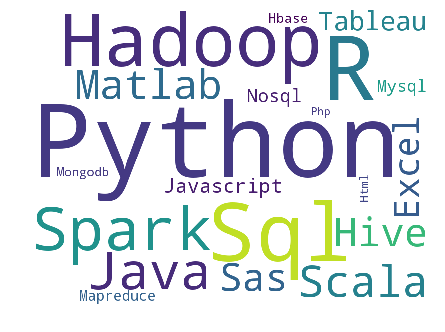

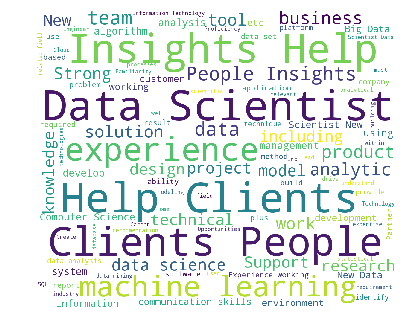

Python       19.61%
R            14.79%
Sql          11.60%
Hadoop        9.49%
Spark         8.17%
Java          5.91%
Scala         4.36%
Matlab        3.81%
Hive          3.58%
Sas           3.42%
Excel         2.80%
Tableau       2.57%
Javascript    1.95%
Nosql         1.63%
Mysql         1.32%
Mapreduce     1.01%
Hbase         0.78%
Mongodb       0.70%
Html          0.62%
Php           0.54%
Stata         0.47%
Vba           0.47%
Perl          0.31%
Ios           0.08%
dtype: float64

In [20]:
ds=TextAnalysis('Data Scientist')
        
ds.programming_skill() 
ds.draw_wordcloud()  
ds.draw_bigram(100)
ds.skills_fq

## Similar Jobs For YOU

In [22]:
class Network(TextAnalysis):
    def __init__(self,job1):
        self.job=job1
        self.startnode=TextAnalysis(job1)
   #     self.endnode=TextAnalysis(job2)
        self.startnode.programming_skill()
        self.value=self.startnode.value
        self.skills_fq=self.startnode.skills_fq
        self.skills=self.startnode.skills
        self.corpus=self.startnode.corpus
   #     self.endnode.programming_skill()
  #      self.edge2=self.endnode.skills_fq
        job_title=['Business Analyst','Business Intelligence Engineer','Consultant','Data Analyst',
                   'Data Engineer','Data Scientist','Global Markets Analyst','Investment Banking Analyst',
                   'Java Developer','Media Analyst','Operations Analyst','Portfolio Analyst',
                   'Pricing Analyst','Program Manager','Project Manager','Quantitative Analyst','Quantitative Trader',
                   'Risk Management','Strategic Sourcing Manager']
        self.job_title=job_title
  
# ==============================================================================
#     def edge_identify(self,job2):
#        
#        endnode=TextAnalysis(job2)
#        endnode.programming_skill()
#        if len(set(self.edge1[:5].index) & set(endnode.skills_fq[:5].index)) >=4:
#            return True
#    #         self
#        else:
#            return False
#==============================================================================
# use cosine similarity
    def edge_identify(self,job2,threshold=0.8):
        
        endnode=TextAnalysis(job2)
        endnode.programming_skill()
        dic1=self.skills
        dic2=endnode.skills
        numerator = 0
        de1 = 0
        for key1,count1 in dic1.items():
            numerator += count1*dic2.get(key1,0.0)
            de1 += count1*count1
        de2 = 0
        for count2 in dic2.values():
            de2 += count2*count2
        result= numerator/math.sqrt(de1*de2) 
        return result
#==============================================================================
#         if result >=threshold:
#             return True,result
#         else:
#             return False,result
#==============================================================================
        
    def job_connection(self,threshold=0.8):
        job_con=list()
        for i in self.job_title:
            if i != self.job:          
               job_con.append((i,self.edge_identify(i,threshold)))
            else:
                pass     
        self.job_con=job_con    
        
    def draw_network(self,threshold=0.8):
        job_network=nx.Graph()
        self.job_connection(threshold)
        job_con=self.job_con
  #      ebold=list()
  #      edash=list()
        for i in range(len(job_con)):
            job_network.add_edge(self.job,job_con[i][0],sim=round(job_con[i][1],2))
               # bold.append((self.job,job_con[i][0],job_con[i][1]))
        elarge=[(u,v) for (u,v,d) in job_network.edges(data=True) if d['sim'] >threshold]
        esmall=[(u,v) for (u,v,d) in job_network.edges(data=True) if d['sim'] <=threshold]

        plt.figure(1,figsize=(12,12)) 
        pos=nx.spring_layout(job_network)   
        nx.draw_networkx_nodes(job_network,pos,
                           node_color='r',
                           node_size=800,
                           alpha=0.6) 
        nx.draw_networkx_edges(job_network,pos,edgelist=elarge,edge_color='b',
                    width=6)

        nx.draw_networkx_edges(job_network,pos,edgelist=esmall,
                    width=6,alpha=0.5,edge_color='b',style='dashed')
        node_name={}
        for node in job_network.nodes():
            node_name[node]=str(node)
        nx.draw_networkx_labels(job_network,pos,node_name,font_size=10,font_family='sans-serif',font_weight='bold')  
        nx.draw_networkx_edge_labels(job_network,pos,font_size=10)


        plt.axis('off')
        plt.savefig("job_network.png")
        return plt.savefig('static/network%s.png'%self.job)

In [26]:
import networkx as nx
import math 

FileNotFoundError: [Errno 2] No such file or directory: 'static/networkData Scientist.png'

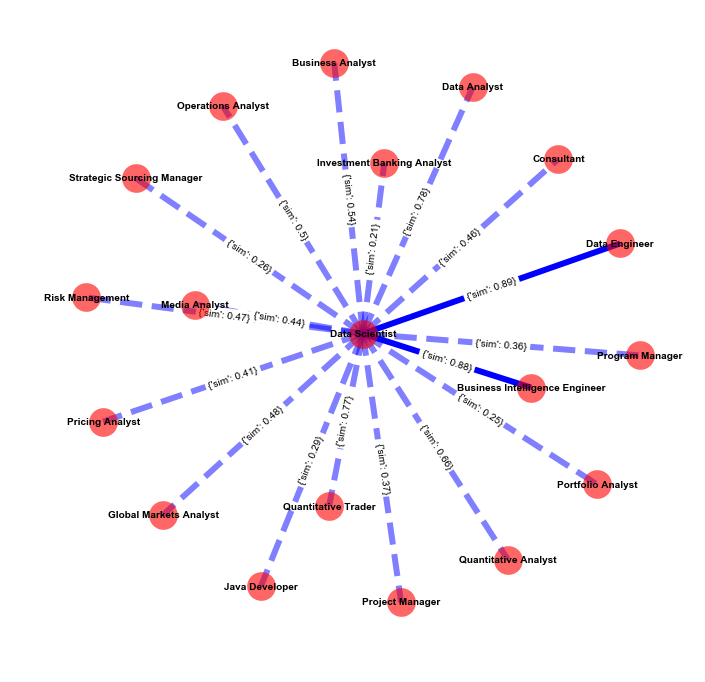

In [27]:
k=Network('Data Scientist')
k.draw_network(threshold=0.85)
# j_title = 'Consultant'
k.draw_wordcloud()  